2.8. Итоговое задание
===

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Описание датасета
===
Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта
===
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
1. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
1. Оцените количество уникальных значений для номинативных переменных.
1. По необходимости преобразуйте данные
1. Проведите корреляционный анализ количественных переменных
1. Отберите не коррелирующие переменные.
1. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
1. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

Цели и задачи проекта
===
Провести EDA. Очистить данные. Отобрать значимые для модели столбцы.

- Анализируем столбцы.
- Выбросы и пропуски заменим на Dirty для строк, среднее для категорий, среднее для числовых.
- Проверяем и если надо повторяем.
- Проводим корреляционный анализ
- Отбираем влияющие аттрибуты
- Делаем выводы

0) Инициализация
===

In [1159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from collections import OrderedDict

In [1160]:
students = pd.read_csv('stud_math.csv')

In [1161]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1162]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1163]:
print(list(students))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


1) Первичная обработка
===

Изначально был отдельный подход к числовым и номинативным признакам.

Также изначально не исправил пробелы, а только убрал выбросы.

@Komissarov Artem поделился функцией и я всё переписал на универсальный код.
```
def unique_nan_value(name):
    '''Функция показывает все значения в колонке, а так же уникальные и пустые'''
    uniq = math[name].nunique()
    empty = math[name].isnull().sum()
    values = math[name].value_counts()
    print(f'Значения в колонке: Уникальные: {uniq}, Пустые: {empty}. \n{values}' )
```

In [1164]:
# Оставлено для примера, более не используется
to_drop_leftovers={} #для сбора столбцов с выбросами
def drop_leftovers():
  '''Процедура избавления от выбросов. Приходится проходить дважды,
     так как есть записы с выбросами сразу по двум параметрам.'''
  global students, to_drop_leftovers
  df = students
  print('План очистки от выбросов')
  for (column,range) in to_drop_leftovers.items():
    drop_count = (df[column]<range[0]).sum() + (df[column]>range[1]).sum()
    print(f'Из столбца {column} выбросим {drop_count} значений')
  print()
  print('Факт очистки от выбросов')
  for (column,range) in to_drop_leftovers.items():
    drop_count = (df[column]<range[0]).sum() + (df[column]>range[1]).sum()
    print(f'Из столбца {column} выбросим {drop_count} значений')
    df = df.loc[df[column] >= range[0]]
    df = df.loc[df[column] <= range[1]]
  students = df

In [1165]:
analized_columns={} # информация о проверенных столбцах

In [1166]:
def calculate_leftovers(column,**kwargs):
  '''Процедура анализа рапределения с применением IQR и предложенных рамок'''
  global students
  min_border = students[column].min()
  perc25 = students[column].quantile(0.25)
  perc50 = students[column].quantile(0.50)
  perc75 = students[column].quantile(0.75)
  max_border = students[column].max()
  IQR = perc75 - perc25
  low_border = perc25 - 1.5*IQR
  high_border = perc75 + 1.5*IQR
  
  if 'low' in kwargs.keys():
    if kwargs['low'] != None:
      min_border = kwargs['low']
  if 'high' in kwargs.keys():
    if kwargs['high'] != None:
      max_border = kwargs['high']
  print('','below', 'low', '25', '50', '75', 'high', 'above', sep='\t')
  print('IQR', students.query(column+'<@low_border')[column].count(), \
        low_border, perc25, \
        students[column].quantile(0.50),
        perc75, high_border, \
        students.query(column+'>@high_border')[column].count(), sep='\t')
  students[column].loc[students[column].between(low_border,high_border)] \
    .hist(range = (min_border, max_border), label = 'IQR')

  if 'low' in kwargs.keys():
    if kwargs['low'] != None:
      low_border = kwargs['low']
  if 'high' in kwargs.keys():
    if kwargs['low'] != None:
      high_border = kwargs['high']
  print('user', students.query(column+'<@low_border')[column].count(), \
        low_border, perc25, \
        students[column].quantile(0.50),
        perc75, high_border, \
        students.query(column+'>@high_border')[column].count(), sep='\t')
  print()
  students[column].loc[students[column].between(low_border,high_border)] \
    .hist(range = (min_border, max_border), alpha = 0.5, label = 'Supposed')

  plt.legend();
  display(plt.plot(students[column].loc[students[column]\
                                        .between(min_border,max_border)]\
                   .value_counts().sort_index()))   

In [1167]:
def scrutinize_column(column, calc_left=True):
  '''Процедура детального анализа столбцов
     По умолчанию пытается построить график
     Так же принимает tuple с границами и ищет границы в analized_columns
     Для объектных столбцов вывод конечно скромнее'''
  global students, analized_columns
  data_type=students[column].dtype
  print(f'Анализируем столбец {column} типа {data_type}.')
  if data_type==type(object):
    calc_left=False
    mean='N/A'
    std='N/A'
    #suggestion="analized_columns['"+column+"'] = {'borders':(),'replaces':('"+str(students[column].mode()[0])+"',[])}"
    suggestion="analized_columns['"+column+"'] = {'borders':(),'replaces':('Dirty',[])}"
  else:
    mean='{:+.3f}'.format(students[column].mean())
    std='{:+.3f}'.format(students[column].std())
    suggestion="analized_columns['"+column+"'] = {'borders':(),'replaces':("+str(students[column].mean())+",[])}"
  print(suggestion)
  print()
  print('count','null','unique','relev','mean','std',sep='\t')
  print(students[column].count(),
        students[column].isnull().sum(), \
        students[column].nunique(),
        (students[column].value_counts()>students[column].count()/100*5).sum(),
        mean,
        std,
        sep='\t')
  print()
  display(pd.DataFrame(students[column].value_counts(dropna=False)).transpose())
  print()
  #students.loc[:, [column]].info(memory_usage='deep')
  if type(calc_left)==type(True) and calc_left:
    calc_left = (None,None)
    if column in analized_columns.keys():
      if 'borders' in analized_columns[column].keys():
        calc_left = analized_columns[column]['borders']
  if type(calc_left)==type((0,0)):
    calculate_leftovers(column, \
                        low=calc_left[0], \
                        high=calc_left[1])
    print()

In [1168]:
def make_replaces():
  '''Процедура осуществления автоматизированной замены выбросов и пустот'''
  global students, analized_columns
  for (column,data) in analized_columns.items():
    if 'replaces' in data.keys():
      replace_count = students[column].isnull().sum()
      for old_value in data['replaces'][1]:
        replace_count += (students[column]==old_value).sum()
        students[column].replace(inplace=True, to_replace=old_value, value=data['replaces'][0])
      students[column].fillna(inplace=True, value=data['replaces'][0])
      print(f'{replace_count} раз в столбце {column} заменим {data["replaces"][1]} на {data["replaces"][0]}')


In [1169]:
def get_boxplot(column):
  '''Процедура взятая из примера для анализа номинативных атрибутов'''
  global students
  print(column)
  fig, ax = plt.subplots(figsize = (14, 4))
  sns.boxplot(x=column, y='score', 
              data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
              ax=ax)
  plt.xticks(rotation=45)
  ax.set_title('Boxplot for ' + column)
  plt.show()

In [1170]:
def get_stat_dif(column):
  '''Процедура взятая из примера реализующая тест Стьюдента'''
  cols = students.loc[:, column].value_counts().index[:10]
  combinations_all = list(combinations(cols, 2))
  for comb in combinations_all:
    if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], \
                 students.loc[students.loc[:, column] == comb[1], 'score'] \
       ).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
      print('Найдены статистически значимые различия для колонки', column)
      break

In [1171]:
'''При корреляционном анализе обнаружился этот столбец. Это явно копия другого
   столбца смещённая для обфускации. Запятая ломала применяемые самопальные
   процедуры вот и пришлось переименовать хоть и после надо совсем выкинуть'''
students.rename(inplace=True, \
                columns={'studytime, granular':'studytime_granular'})

2) Численные признаки
===

In [1172]:
'''Первый беглый проход по числовым атрибутам'''
for column in students.select_dtypes(exclude='object').columns.tolist():
  scrutinize_column(column,calc_left=False)

Анализируем столбец age типа int64.
analized_columns['age'] = {'borders':(),'replaces':(16.696202531645568,[])}

count	null	unique	relev	mean	std
395	0	8	5	+16.696	+1.276



,16,17,18,15,19,20,22,21
age,104,98,82,82,24,3,1,1



Анализируем столбец Medu типа float64.
analized_columns['Medu'] = {'borders':(),'replaces':(2.75,[])}

count	null	unique	relev	mean	std
392	3	5	4	+2.750	+1.098



,4.0,2.0,3.0,1.0,0.0,NaN
Medu,131,102,97,59,3,3



Анализируем столбец Fedu типа float64.
analized_columns['Fedu'] = {'borders':(),'replaces':(2.61455525606469,[])}

count	null	unique	relev	mean	std
371	24	6	4	+2.615	+2.229



,2.0,3.0,4.0,1.0,NaN,0.0,40.0
Fedu,106,96,88,78,24,2,1



Анализируем столбец traveltime типа float64.
analized_columns['traveltime'] = {'borders':(),'replaces':(1.438692098092643,[])}

count	null	unique	relev	mean	std
367	28	4	3	+1.439	+0.694



,1.0,2.0,NaN,3.0,4.0
traveltime,242,96,28,22,7



Анализируем столбец studytime типа float64.
analized_columns['studytime'] = {'borders':(),'replaces':(2.038659793814433,[])}

count	null	unique	relev	mean	std
388	7	4	4	+2.039	+0.842



,2.0,1.0,3.0,4.0,NaN
studytime,194,103,64,27,7



Анализируем столбец failures типа float64.
analized_columns['failures'] = {'borders':(),'replaces':(0.3378016085790885,[])}

count	null	unique	relev	mean	std
373	22	4	2	+0.338	+0.743



,0.0,1.0,NaN,2.0,3.0
failures,293,49,22,16,15



Анализируем столбец studytime_granular типа float64.
analized_columns['studytime_granular'] = {'borders':(),'replaces':(-6.115979381443299,[])}

count	null	unique	relev	mean	std
388	7	4	4	-6.116	+2.526



,-6.0,-3.0,-9.0,-12.0,NaN
studytime_granular,194,103,64,27,7



Анализируем столбец famrel типа float64.
analized_columns['famrel'] = {'borders':(),'replaces':(3.9375,[])}

count	null	unique	relev	mean	std
368	27	6	3	+3.938	+0.927



,4.0,5.0,3.0,NaN,2.0,1.0,-1.0
famrel,182,99,62,27,17,7,1



Анализируем столбец freetime типа float64.
analized_columns['freetime'] = {'borders':(),'replaces':(3.2317708333333335,[])}

count	null	unique	relev	mean	std
384	11	5	4	+3.232	+0.994



,3.0,4.0,2.0,5.0,1.0,NaN
freetime,153,112,63,38,18,11



Анализируем столбец goout типа float64.
analized_columns['goout'] = {'borders':(),'replaces':(3.1059431524547803,[])}

count	null	unique	relev	mean	std
387	8	5	5	+3.106	+1.116



,3.0,2.0,4.0,5.0,1.0,NaN
goout,127,101,84,52,23,8



Анализируем столбец health типа float64.
analized_columns['health'] = {'borders':(),'replaces':(3.531578947368421,[])}

count	null	unique	relev	mean	std
380	15	5	5	+3.532	+1.396



,5.0,3.0,4.0,1.0,2.0,NaN
health,138,89,63,47,43,15



Анализируем столбец absences типа float64.
analized_columns['absences'] = {'borders':(),'replaces':(7.2793733681462145,[])}

count	null	unique	relev	mean	std
383	12	36	5	+7.279	+23.465



,0.0,2.0,4.0,6.0,8.0,10.0,12.0,NaN,14.0,3.0,16.0,7.0,5.0,18.0,20.0,1.0,22.0,9.0,13.0,15.0,11.0,25.0,54.0,385.0,26.0,56.0,24.0,212.0,21.0,75.0,30.0,19.0,38.0,40.0,23.0,17.0,28.0
absences,111,60,53,31,21,17,12,12,12,8,7,6,5,5,4,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



Анализируем столбец score типа float64.
analized_columns['score'] = {'borders':(),'replaces':(52.26221079691517,[])}

count	null	unique	relev	mean	std
389	6	18	9	+52.262	+22.919



,50.0,55.0,0.0,75.0,65.0,40.0,60.0,45.0,70.0,80.0,30.0,90.0,35.0,25.0,NaN,85.0,95.0,100.0,20.0
score,54,46,37,33,31,31,31,27,27,16,15,12,9,7,6,6,5,1,1


In [1173]:
analized_columns['age'] = {'borders':(15,22),'replaces':(16.7,[])}
# без выбросов, без пропусков

analized_columns['Medu'] = {'borders':(0,4),'replaces':(2.75,[])}
# без выбросов, есть пропуски

analized_columns['Fedu'] = {'borders':(0,4),'replaces':(2.6,[40])}
# есть выбросы, есть пропуски

analized_columns['traveltime'] = {'borders':(0,4),'replaces':(1.44,[])}
# без выбросов, есть пропуски

analized_columns['studytime'] = {'borders':(1,4),'replaces':(2,[])}
# без выбросов, есть пропуски

analized_columns['failures'] = {'borders':(0,3),'replaces':(0.38,[])}
# без выбросов, есть пропуски

analized_columns['studytime_granular'] = {'borders':(-12,-3),'replaces':(-6,[])}
# без выбросов, есть пропуски
# после корреляционного анализа придётся выбросить целиком

analized_columns['famrel'] = {'borders':(1,5),'replaces':(3.94,[-1])}
# есть выбросы, есть пропуски

analized_columns['freetime'] = {'borders':(1,5),'replaces':(3.23,[])}
# без выбросов, есть пропуски

analized_columns['goout'] = {'borders':(1,5),'replaces':(3.11,[])}
# без выбросов, есть пропуски

analized_columns['health'] = {'borders':(1,5),'replaces':(3.53,[])}
# без выбросов, есть пропуски

# analized_columns['absences'] = {'borders':(1,22),'replaces':(7.23,[])}
# есть выбросы, есть пропуски
# возможно стоит перевести в категории и точно нужен индивидуальный подход

# analized_columns['score'] = {'borders':(),'replaces':(52.26,[])}
# есть выбросы, есть пропуски
# возможно стоит перевести в категории и точно нужен индивидуальный подход

А теперь чуть детальней с графиками

Анализируем столбец age типа int64.
analized_columns['age'] = {'borders':(),'replaces':(16.696202531645568,[])}

count	null	unique	relev	mean	std
395	0	8	5	+16.696	+1.276



,16,17,18,15,19,20,22,21
age,104,98,82,82,24,3,1,1



	below	low	25	50	75	high	above
IQR	0	13.0	16.0	17.0	18.0	21.0	1
user	0	15	16.0	17.0	18.0	22	0



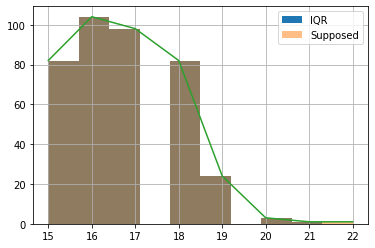

In [1174]:
scrutinize_column('age')

Анализируем столбец Medu типа float64.
analized_columns['Medu'] = {'borders':(),'replaces':(2.75,[])}

count	null	unique	relev	mean	std
392	3	5	4	+2.750	+1.098



,4.0,2.0,3.0,1.0,0.0,NaN
Medu,131,102,97,59,3,3



	below	low	25	50	75	high	above
IQR	0	-1.0	2.0	3.0	4.0	7.0	0
user	0	0	2.0	3.0	4.0	4	0



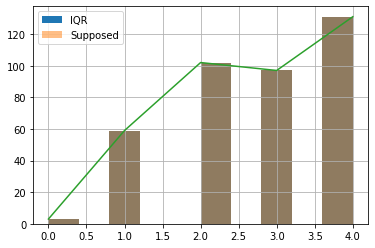

In [1175]:
scrutinize_column('Medu')

Анализируем столбец Fedu типа float64.
analized_columns['Fedu'] = {'borders':(),'replaces':(2.61455525606469,[])}

count	null	unique	relev	mean	std
371	24	6	4	+2.615	+2.229



,2.0,3.0,4.0,1.0,NaN,0.0,40.0
Fedu,106,96,88,78,24,2,1



	below	low	25	50	75	high	above
IQR	2	0.5	2.0	2.0	3.0	4.5	1
user	0	0	2.0	2.0	3.0	4	1



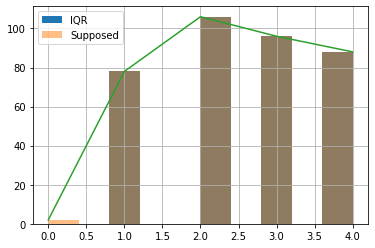

In [1176]:
scrutinize_column('Fedu')

Анализируем столбец traveltime типа float64.
analized_columns['traveltime'] = {'borders':(),'replaces':(1.438692098092643,[])}

count	null	unique	relev	mean	std
367	28	4	3	+1.439	+0.694



,1.0,2.0,NaN,3.0,4.0
traveltime,242,96,28,22,7



	below	low	25	50	75	high	above
IQR	0	-0.5	1.0	1.0	2.0	3.5	7
user	0	0	1.0	1.0	2.0	4	0



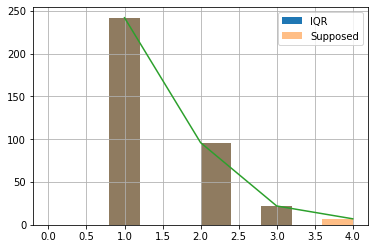

In [1177]:
scrutinize_column('traveltime')

Анализируем столбец studytime типа float64.
analized_columns['studytime'] = {'borders':(),'replaces':(2.038659793814433,[])}

count	null	unique	relev	mean	std
388	7	4	4	+2.039	+0.842



,2.0,1.0,3.0,4.0,NaN
studytime,194,103,64,27,7



	below	low	25	50	75	high	above
IQR	0	-0.5	1.0	2.0	2.0	3.5	27
user	0	1	1.0	2.0	2.0	4	0



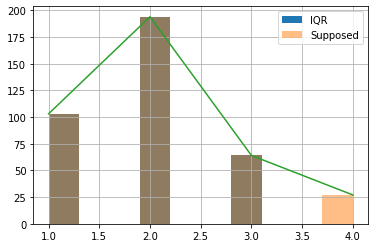

In [1178]:
scrutinize_column('studytime')

Анализируем столбец studytime_granular типа float64.
analized_columns['studytime_granular'] = {'borders':(),'replaces':(-6.115979381443299,[])}

count	null	unique	relev	mean	std
388	7	4	4	-6.116	+2.526



,-6.0,-3.0,-9.0,-12.0,NaN
studytime_granular,194,103,64,27,7



	below	low	25	50	75	high	above
IQR	27	-10.5	-6.0	-6.0	-3.0	1.5	0
user	0	-12	-6.0	-6.0	-3.0	-3	0



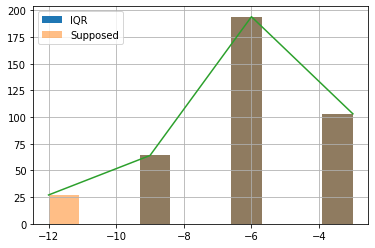

In [1179]:
scrutinize_column('studytime_granular')
#Без выбросов, но после корреляционного анализа придётся выбросить целиком

Анализируем столбец failures типа float64.
analized_columns['failures'] = {'borders':(),'replaces':(0.3378016085790885,[])}

count	null	unique	relev	mean	std
373	22	4	2	+0.338	+0.743



,0.0,1.0,NaN,2.0,3.0
failures,293,49,22,16,15



	below	low	25	50	75	high	above
IQR	0	0.0	0.0	0.0	0.0	0.0	80
user	0	0	0.0	0.0	0.0	3	0



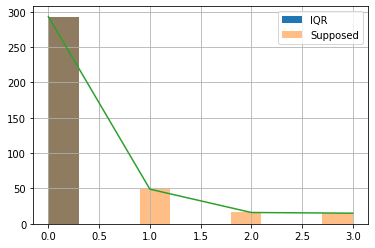

In [1180]:
scrutinize_column('failures')

Анализируем столбец famrel типа float64.
analized_columns['famrel'] = {'borders':(),'replaces':(3.9375,[])}

count	null	unique	relev	mean	std
368	27	6	3	+3.938	+0.927



,4.0,5.0,3.0,NaN,2.0,1.0,-1.0
famrel,182,99,62,27,17,7,1



	below	low	25	50	75	high	above
IQR	25	2.5	4.0	4.0	5.0	6.5	0
user	1	1	4.0	4.0	5.0	5	0



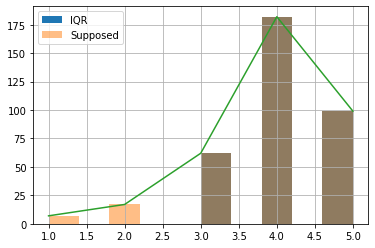

In [1181]:
scrutinize_column('famrel')

Анализируем столбец freetime типа float64.
analized_columns['freetime'] = {'borders':(),'replaces':(3.2317708333333335,[])}

count	null	unique	relev	mean	std
384	11	5	4	+3.232	+0.994



,3.0,4.0,2.0,5.0,1.0,NaN
freetime,153,112,63,38,18,11



	below	low	25	50	75	high	above
IQR	18	1.5	3.0	3.0	4.0	5.5	0
user	0	1	3.0	3.0	4.0	5	0



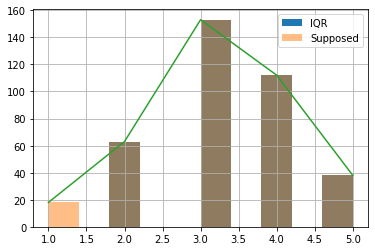

In [1182]:
scrutinize_column('freetime')

Анализируем столбец goout типа float64.
analized_columns['goout'] = {'borders':(),'replaces':(3.1059431524547803,[])}

count	null	unique	relev	mean	std
387	8	5	5	+3.106	+1.116



,3.0,2.0,4.0,5.0,1.0,NaN
goout,127,101,84,52,23,8



	below	low	25	50	75	high	above
IQR	0	-1.0	2.0	3.0	4.0	7.0	0
user	0	1	2.0	3.0	4.0	5	0



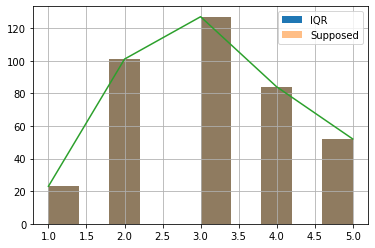

In [1183]:
scrutinize_column('goout')

Анализируем столбец health типа float64.
analized_columns['health'] = {'borders':(),'replaces':(3.531578947368421,[])}

count	null	unique	relev	mean	std
380	15	5	5	+3.532	+1.396



,5.0,3.0,4.0,1.0,2.0,NaN
health,138,89,63,47,43,15



	below	low	25	50	75	high	above
IQR	0	0.0	3.0	4.0	5.0	8.0	0
user	0	1	3.0	4.0	5.0	5	0



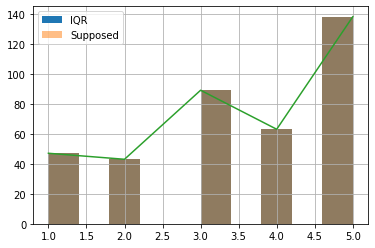

In [1184]:
scrutinize_column('health')

Анализируем столбец absences типа float64.
analized_columns['absences'] = {'borders':(),'replaces':(7.2793733681462145,[])}

count	null	unique	relev	mean	std
383	12	36	5	+7.279	+23.465



,0.0,2.0,4.0,6.0,8.0,10.0,12.0,NaN,14.0,3.0,16.0,7.0,5.0,18.0,20.0,1.0,22.0,9.0,13.0,15.0,11.0,25.0,54.0,385.0,26.0,56.0,24.0,212.0,21.0,75.0,30.0,19.0,38.0,40.0,23.0,17.0,28.0
absences,111,60,53,31,21,17,12,12,12,8,7,6,5,5,4,3,3,3,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



	below	low	25	50	75	high	above
IQR	0	-12.0	0.0	4.0	8.0	20.0	17
user	0	-12.0	0.0	4.0	8.0	20.0	17



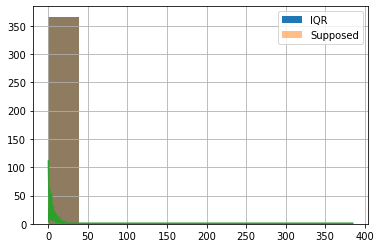

In [1185]:
scrutinize_column('absences')
#Доверимся IQR?!
#to_drop_leftovers['absences']=(0,20)

Анализируем столбец score типа float64.
analized_columns['score'] = {'borders':(),'replaces':(52.26221079691517,[])}

count	null	unique	relev	mean	std
389	6	18	9	+52.262	+22.919



,50.0,55.0,0.0,75.0,65.0,40.0,60.0,45.0,70.0,80.0,30.0,90.0,35.0,25.0,NaN,85.0,95.0,100.0,20.0
score,54,46,37,33,31,31,31,27,27,16,15,12,9,7,6,6,5,1,1



	below	low	25	50	75	high	above
IQR	0	-5.0	40.0	55.0	70.0	115.0	0
user	0	-5.0	40.0	55.0	70.0	115.0	0



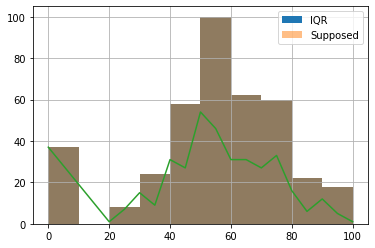

In [1186]:
scrutinize_column('score')

3) Номинативные признаки
===

In [1187]:
for column in students.select_dtypes(include='object').columns.tolist():
  scrutinize_column(column,calc_left=False)

Анализируем столбец school типа object.
analized_columns['school'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
395	0	2	2	N/A	N/A



,GP,MS
school,349,46



Анализируем столбец sex типа object.
analized_columns['sex'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
395	0	2	2	N/A	N/A



,F,M
sex,208,187



Анализируем столбец address типа object.
analized_columns['address'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
378	17	2	2	N/A	N/A



,U,R,NaN
address,295,83,17



Анализируем столбец famsize типа object.
analized_columns['famsize'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
368	27	2	2	N/A	N/A



,GT3,LE3,NaN
famsize,261,107,27



Анализируем столбец Pstatus типа object.
analized_columns['Pstatus'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
350	45	2	2	N/A	N/A



,T,NaN,A
Pstatus,314,45,36



Анализируем столбец Mjob типа object.
analized_columns['Mjob'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
376	19	5	5	N/A	N/A



,other,services,at_home,teacher,health,NaN
Mjob,133,98,58,55,32,19



Анализируем столбец Fjob типа object.
analized_columns['Fjob'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
359	36	5	3	N/A	N/A



,other,services,NaN,teacher,at_home,health
Fjob,197,102,36,29,16,15



Анализируем столбец reason типа object.
analized_columns['reason'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
378	17	4	4	N/A	N/A



,course,home,reputation,other,NaN
reason,137,104,103,34,17



Анализируем столбец guardian типа object.
analized_columns['guardian'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
364	31	3	3	N/A	N/A



,mother,father,NaN,other
guardian,250,86,31,28



Анализируем столбец schoolsup типа object.
analized_columns['schoolsup'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
386	9	2	2	N/A	N/A



,no,yes,NaN
schoolsup,335,51,9



Анализируем столбец famsup типа object.
analized_columns['famsup'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
356	39	2	2	N/A	N/A



,yes,no,NaN
famsup,219,137,39



Анализируем столбец paid типа object.
analized_columns['paid'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
355	40	2	2	N/A	N/A



,no,yes,NaN
paid,200,155,40



Анализируем столбец activities типа object.
analized_columns['activities'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
381	14	2	2	N/A	N/A



,yes,no,NaN
activities,195,186,14



Анализируем столбец nursery типа object.
analized_columns['nursery'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
379	16	2	2	N/A	N/A



,yes,no,NaN
nursery,300,79,16



Анализируем столбец higher типа object.
analized_columns['higher'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
375	20	2	2	N/A	N/A



,yes,NaN,no
higher,356,20,19



Анализируем столбец internet типа object.
analized_columns['internet'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
361	34	2	2	N/A	N/A



,yes,no,NaN
internet,305,56,34



Анализируем столбец romantic типа object.
analized_columns['romantic'] = {'borders':(),'replaces':('Dirty',[])}

count	null	unique	relev	mean	std
364	31	2	2	N/A	N/A



,no,yes,NaN
romantic,240,124,31


In [1188]:
analized_columns['school'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, без пропусков

analized_columns['sex'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, без пропусков

analized_columns['address'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['famsize'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['Pstatus'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['Mjob'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['Fjob'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['reason'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['guardian'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['schoolsup'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['famsup'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['paid'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['activities'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['nursery'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['higher'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['internet'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

analized_columns['romantic'] = {'borders':(),'replaces':('Dirty',[])}
# без выбросов, есть пропуски

school


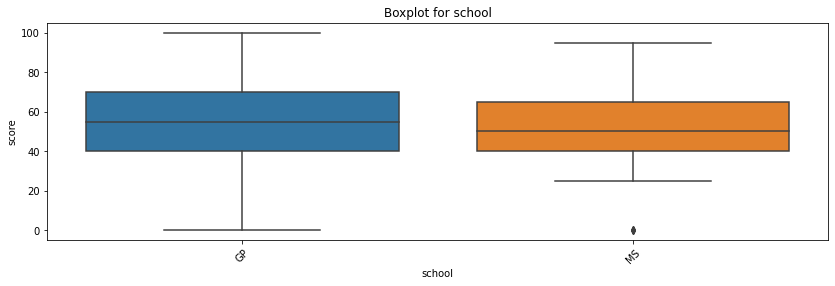

sex


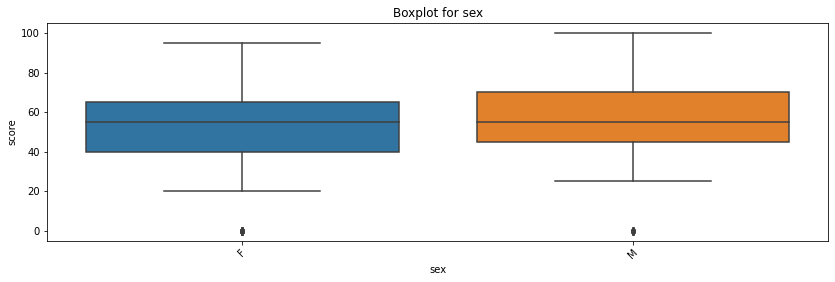

age


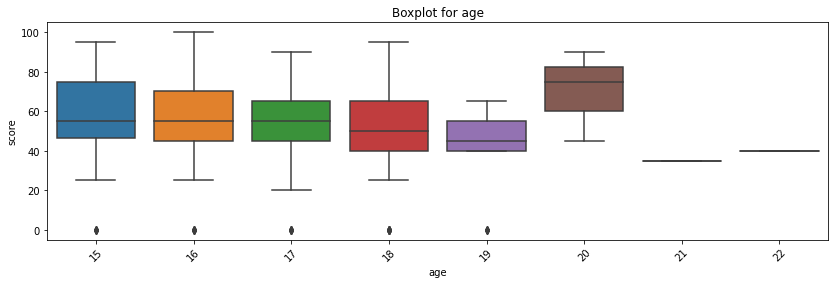

address


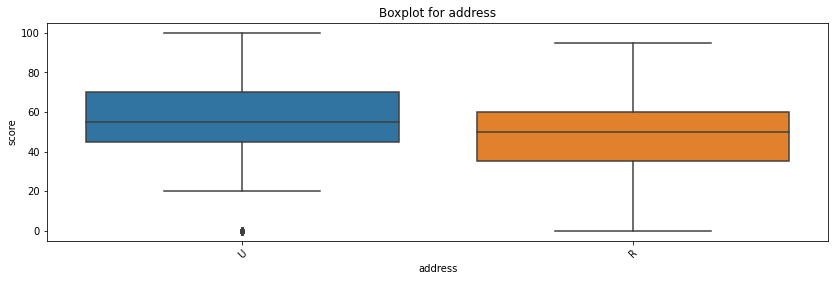

famsize


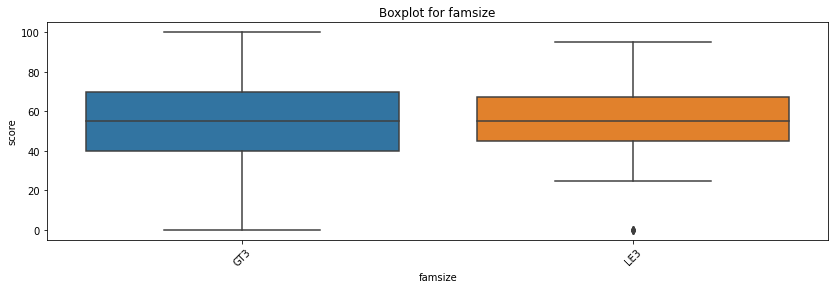

Pstatus


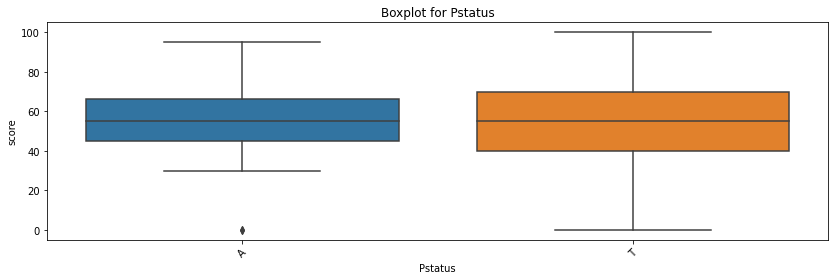

Medu


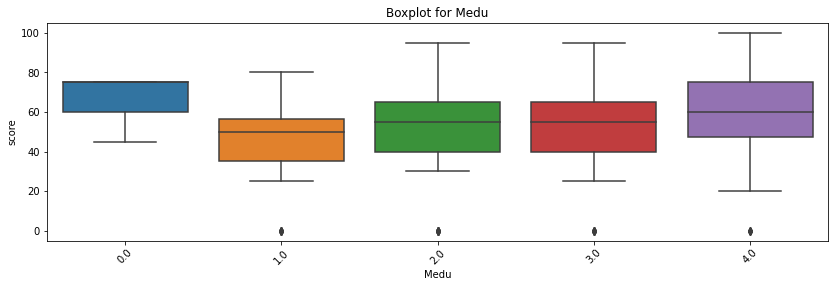

Fedu


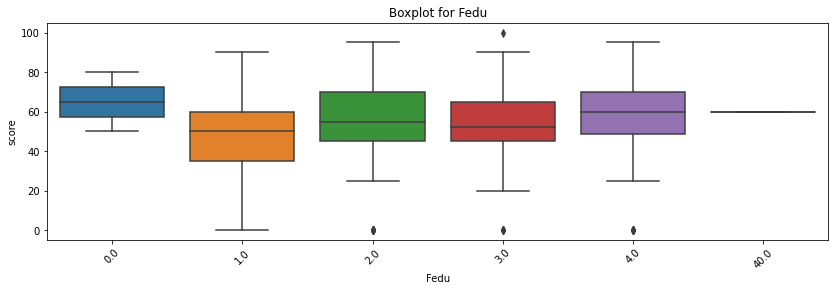

Mjob


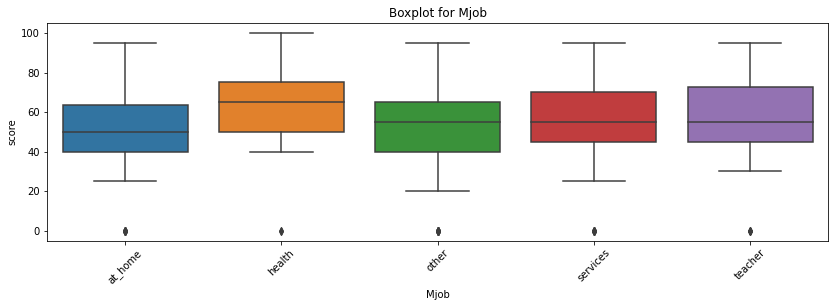

Fjob


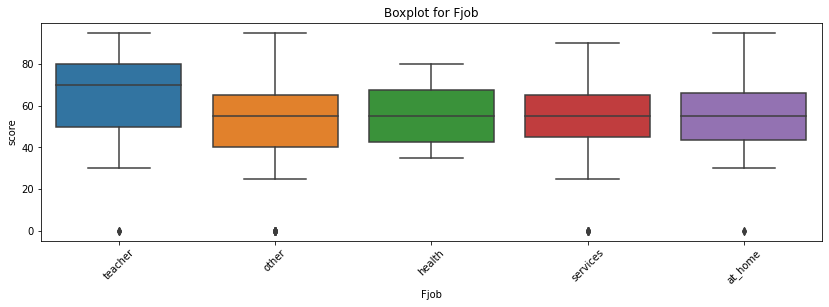

reason


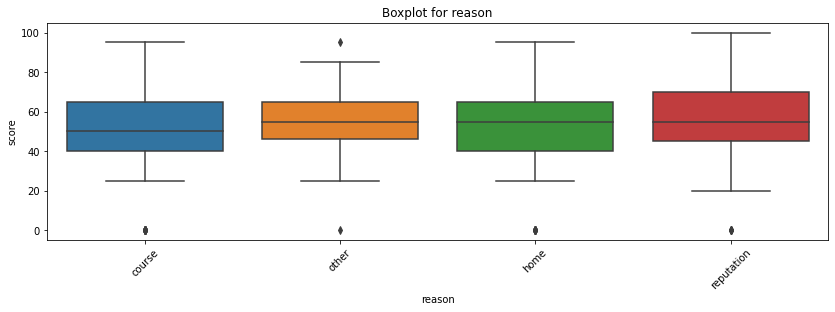

guardian


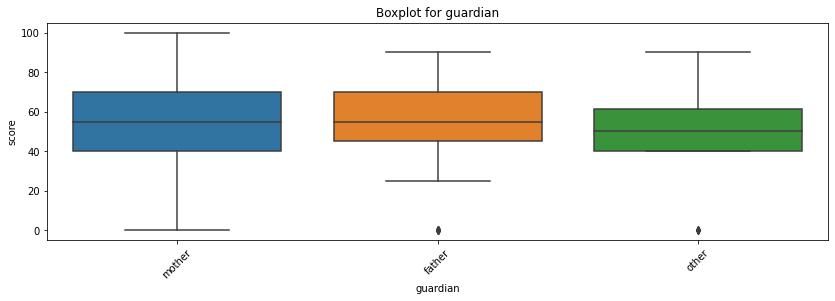

traveltime


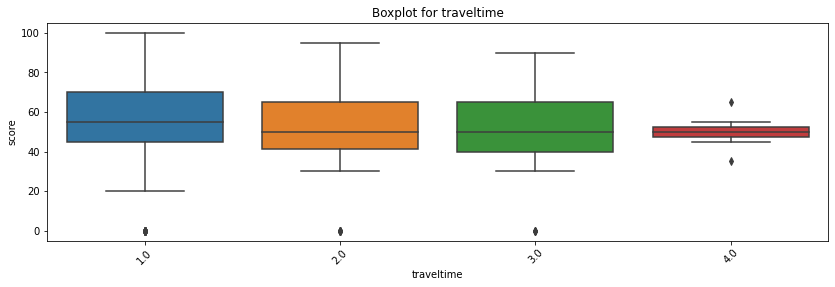

studytime


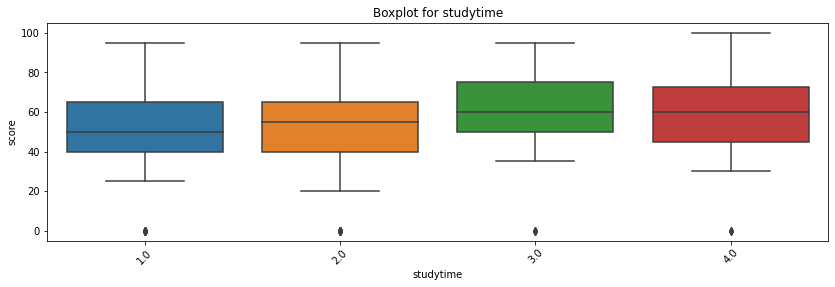

failures


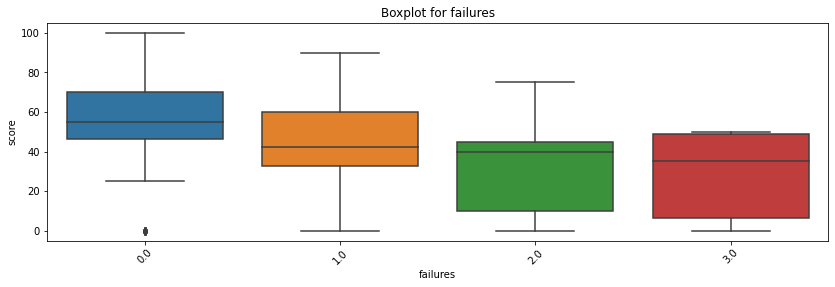

schoolsup


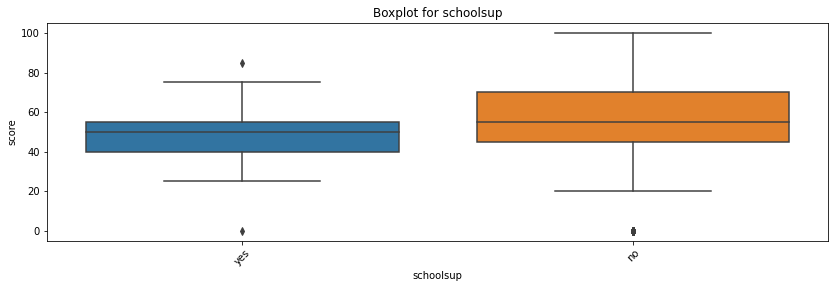

famsup


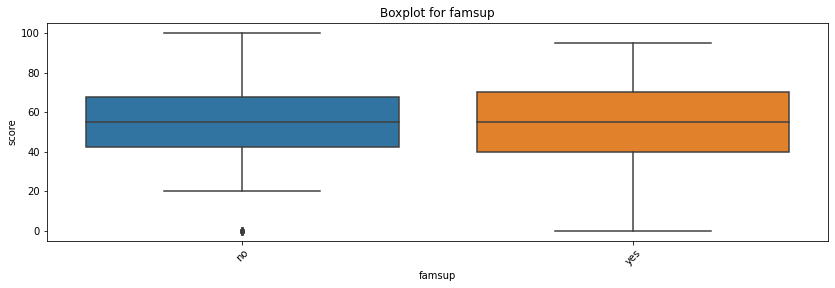

paid


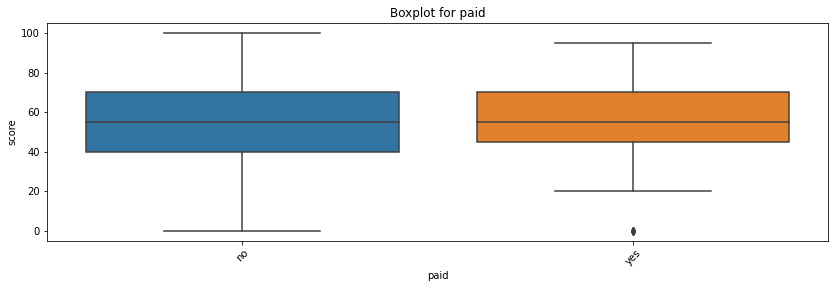

activities


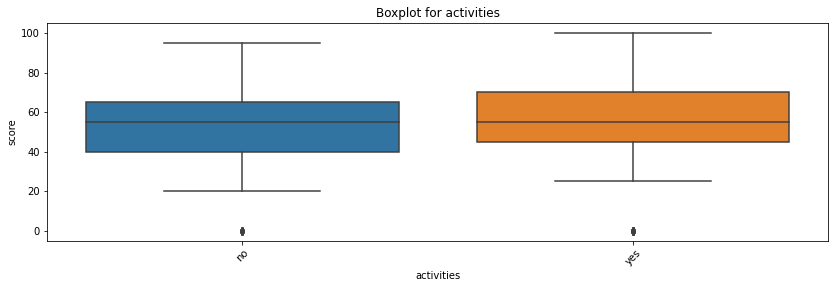

nursery


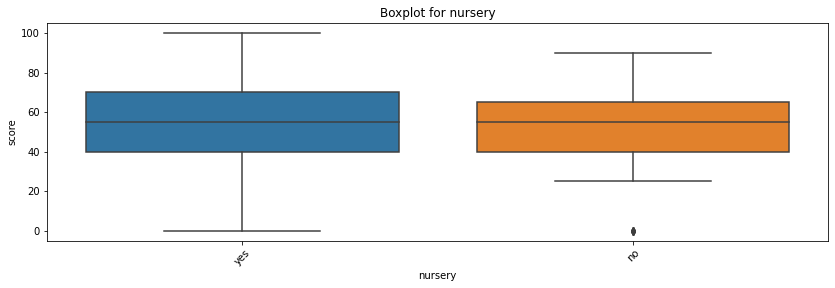

studytime_granular


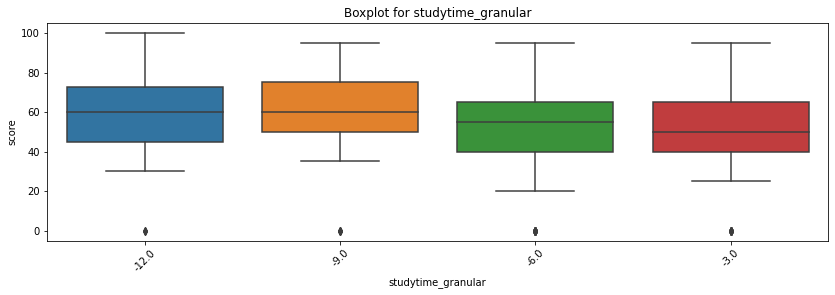

higher


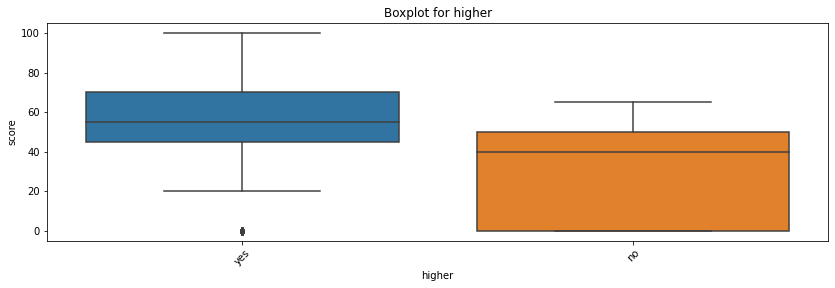

internet


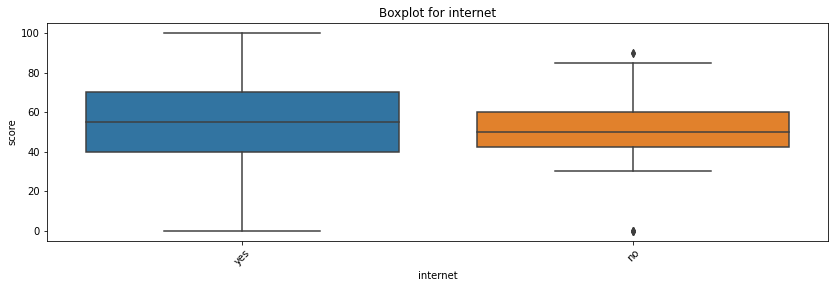

romantic


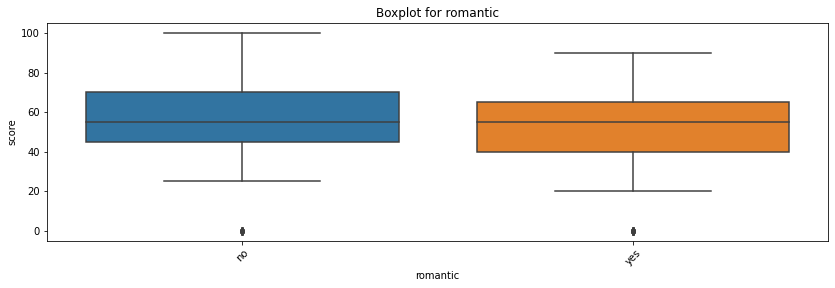

famrel


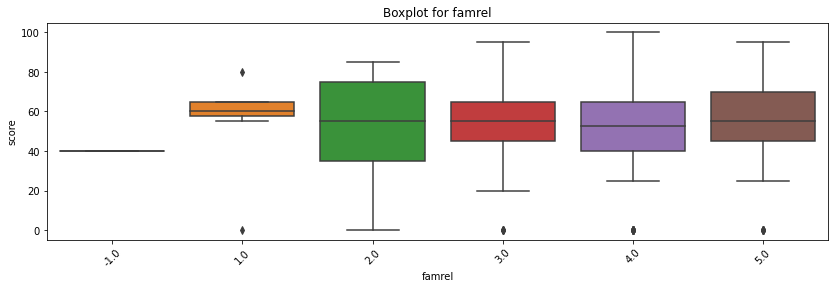

freetime


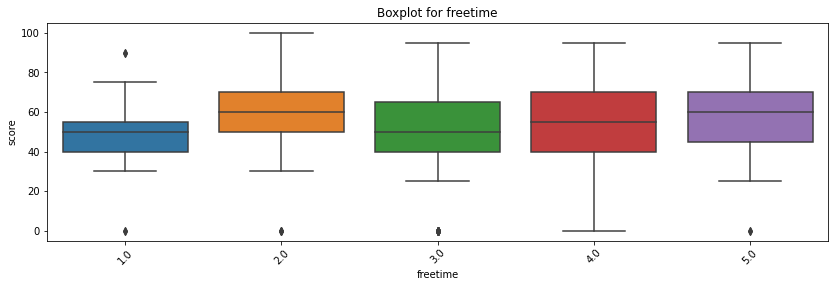

goout


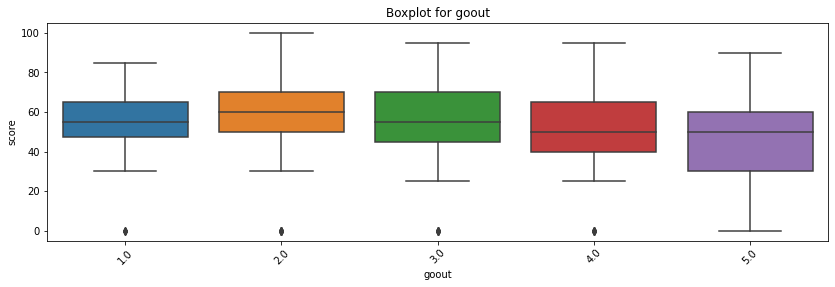

health


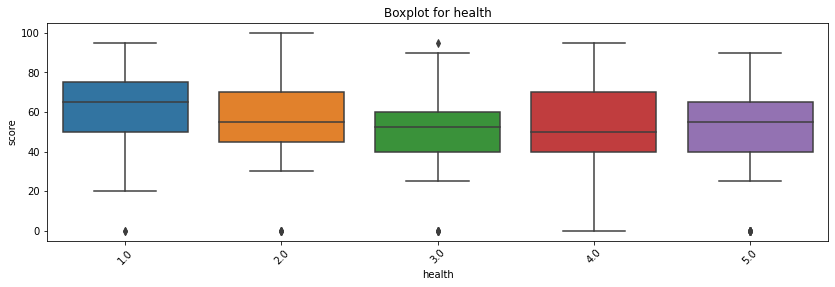

absences


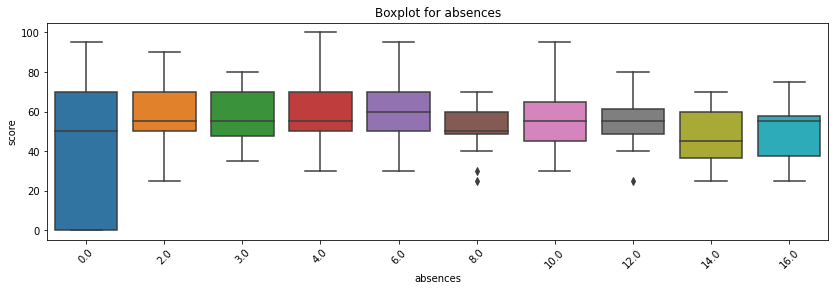

score


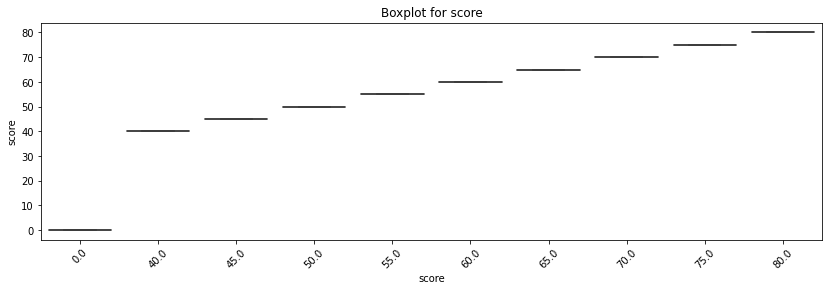

In [1189]:
for col in students.columns.tolist(): get_boxplot(col)

In [1190]:
for column in students.select_dtypes(include='object').columns.tolist():
  get_stat_dif(column)

Найдены статистически значимые различия для колонки Mjob


4) Преобразование
===

Первый подход: отбрасывание выбросов без анализа и заполнения пустот
```
In []
display(to_drop_leftovers)
drop_leftovers()

Out []
{'Fedu': (0, 4), 'absences': (0, 20), 'famrel': (1, 5)}
План очистки от выбросов
Из столбца Fedu выбросим 1 значений
Из столбца famrel выбросим 1 значений
Из столбца absences выбросим 17 значений

Факт очистки от выбросов
Из столбца Fedu выбросим 1 значений
Из столбца famrel выбросим 1 значений
Из столбца absences выбросим 15 значений
```



In [1191]:
analized_columns

{'Fedu': {'borders': (0, 4), 'replaces': (2.6, [40])},
 'Fjob': {'borders': (), 'replaces': ('Dirty', [])},
 'Medu': {'borders': (0, 4), 'replaces': (2.75, [])},
 'Mjob': {'borders': (), 'replaces': ('Dirty', [])},
 'Pstatus': {'borders': (), 'replaces': ('Dirty', [])},
 'activities': {'borders': (), 'replaces': ('Dirty', [])},
 'address': {'borders': (), 'replaces': ('Dirty', [])},
 'age': {'borders': (15, 22), 'replaces': (16.7, [])},
 'failures': {'borders': (0, 3), 'replaces': (0.38, [])},
 'famrel': {'borders': (1, 5), 'replaces': (3.94, [-1])},
 'famsize': {'borders': (), 'replaces': ('Dirty', [])},
 'famsup': {'borders': (), 'replaces': ('Dirty', [])},
 'freetime': {'borders': (1, 5), 'replaces': (3.23, [])},
 'goout': {'borders': (1, 5), 'replaces': (3.11, [])},
 'guardian': {'borders': (), 'replaces': ('Dirty', [])},
 'health': {'borders': (1, 5), 'replaces': (3.53, [])},
 'higher': {'borders': (), 'replaces': ('Dirty', [])},
 'internet': {'borders': (), 'replaces': ('Dirty', 

In [1192]:
make_replaces()

0 раз в столбце age заменим [] на 16.7
3 раз в столбце Medu заменим [] на 2.75
25 раз в столбце Fedu заменим [40] на 2.6
28 раз в столбце traveltime заменим [] на 1.44
7 раз в столбце studytime заменим [] на 2
22 раз в столбце failures заменим [] на 0.38
7 раз в столбце studytime_granular заменим [] на -6
28 раз в столбце famrel заменим [-1] на 3.94
11 раз в столбце freetime заменим [] на 3.23
8 раз в столбце goout заменим [] на 3.11
15 раз в столбце health заменим [] на 3.53
0 раз в столбце school заменим [] на Dirty
0 раз в столбце sex заменим [] на Dirty
17 раз в столбце address заменим [] на Dirty
27 раз в столбце famsize заменим [] на Dirty
45 раз в столбце Pstatus заменим [] на Dirty
19 раз в столбце Mjob заменим [] на Dirty
36 раз в столбце Fjob заменим [] на Dirty
17 раз в столбце reason заменим [] на Dirty
31 раз в столбце guardian заменим [] на Dirty
9 раз в столбце schoolsup заменим [] на Dirty
39 раз в столбце famsup заменим [] на Dirty
40 раз в столбце paid заменим [] на D

In [1193]:
# долой прогульщиков!
students = students.loc[students['absences'] <= 20]

# долой бездарей!
students['score'].fillna( \
  inplace=True, value=round(students['score'].median(),2)
)
students0 = students.loc[students['score'] == 0]
students = students.loc[students['score'] != 0]


5) Корреляционный анализ
===

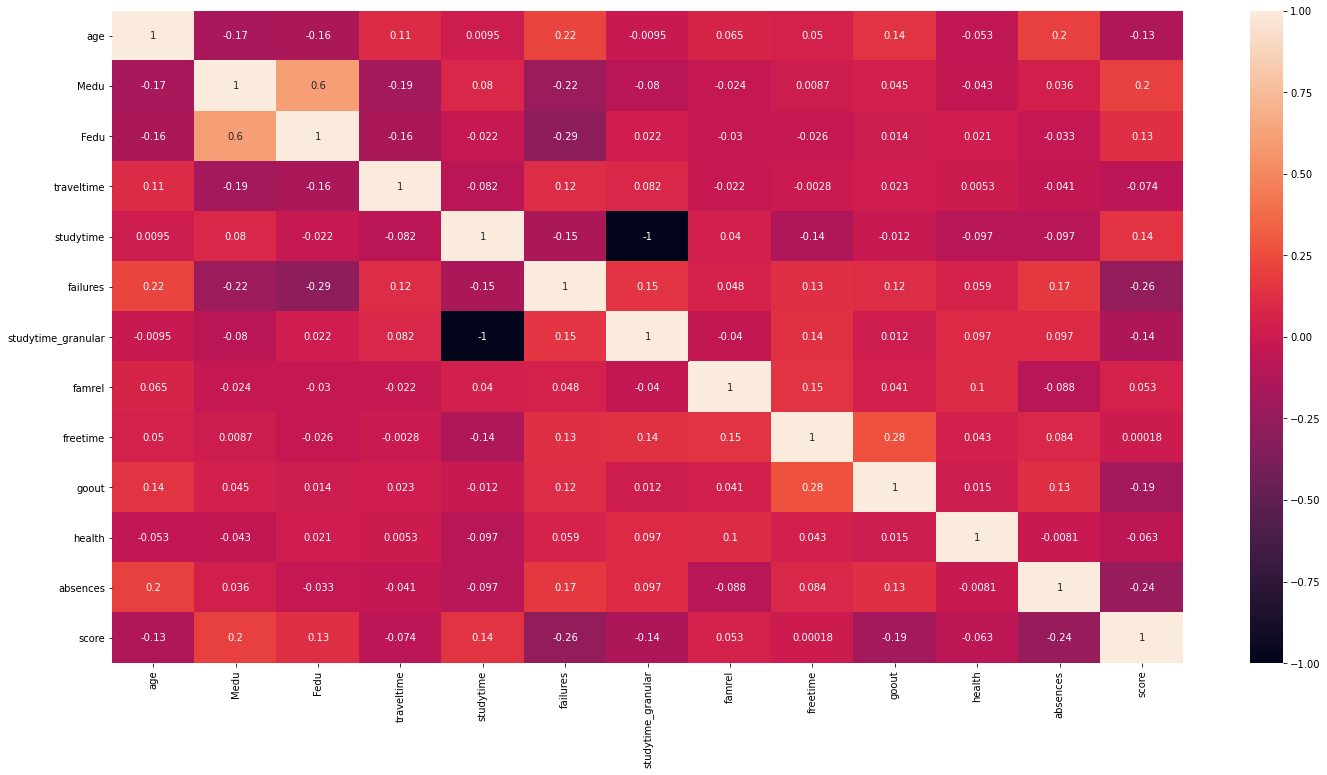

In [1194]:
sns.heatmap(students.corr(), annot=True)
plt.gcf().set_size_inches(24, 12)

In [1195]:
#Отбросим лишнее сразу
students.drop(inplace=True, columns=('studytime_granular'))

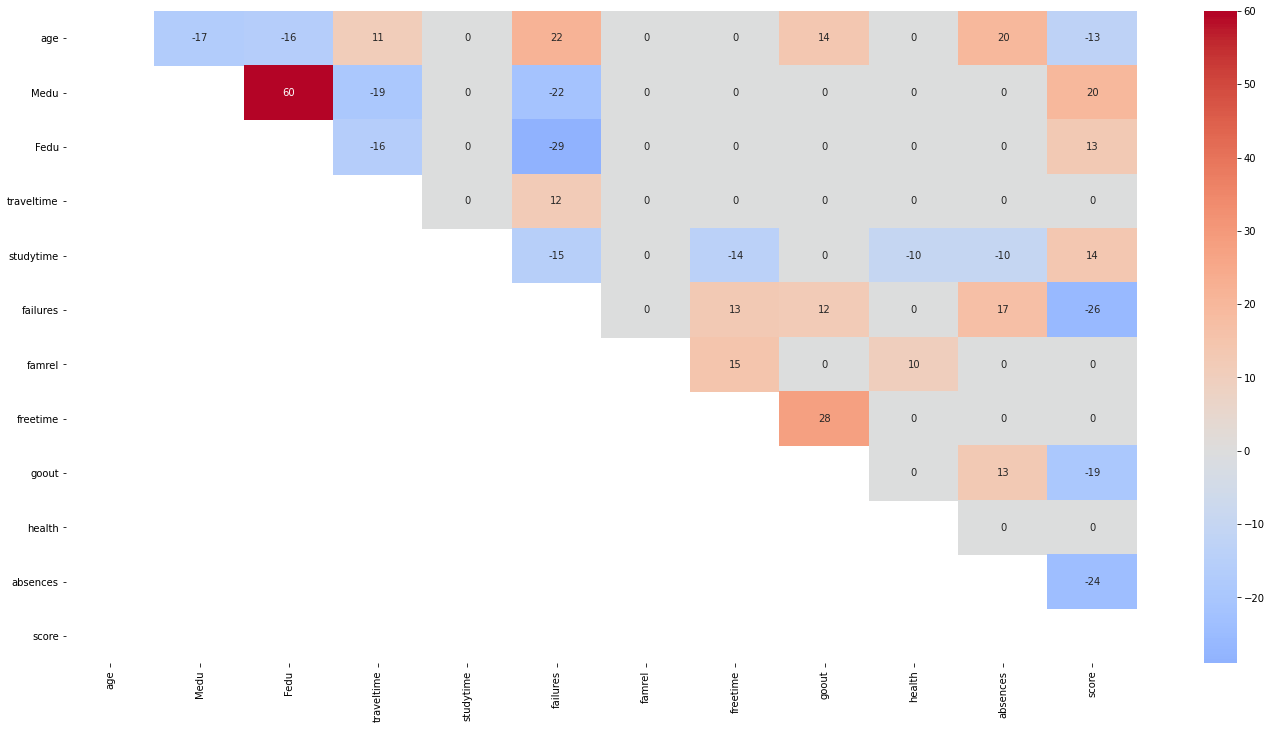

In [1196]:
matrix = np.tril(students.corr())
corr = students.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
plt.gcf().set_size_inches(24, 12)

In [1197]:
students0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,Dirty,T,2.00,2.0,Dirty,other,reputation,mother,1.00,1.0,2.00,no,yes,no,yes,yes,-3.0,yes,yes,no,3.00,3.00,3.00,4.00,0.0,0.0
130,GP,F,15,R,GT3,T,3.00,4.0,services,teacher,course,father,2.00,3.0,2.00,no,yes,no,no,yes,-9.0,yes,yes,yes,4.00,2.00,2.00,5.00,0.0,0.0
131,GP,F,15,U,GT3,Dirty,1.00,1.0,at_home,other,course,mother,3.00,1.0,0.00,no,yes,no,yes,no,-3.0,yes,yes,yes,4.00,3.23,3.00,4.00,0.0,0.0
134,GP,M,15,R,GT3,T,3.00,4.0,at_home,teacher,course,mother,1.44,2.0,0.00,no,yes,no,no,yes,-6.0,yes,no,yes,5.00,3.00,3.00,5.00,0.0,0.0
135,GP,F,15,U,GT3,T,4.00,4.0,services,Dirty,course,mother,1.00,3.0,0.00,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.00,3.00,3.00,5.00,0.0,0.0
136,GP,M,17,R,GT3,T,3.00,4.0,at_home,other,course,mother,3.00,2.0,0.00,no,no,Dirty,no,yes,-6.0,yes,no,no,3.94,4.00,5.00,5.00,0.0,0.0
137,GP,F,16,U,GT3,A,3.00,2.6,other,other,Dirty,other,1.44,1.0,2.00,no,yes,no,yes,no,-3.0,yes,yes,yes,4.00,3.00,2.00,5.00,0.0,0.0
140,GP,M,15,U,GT3,T,4.00,3.0,teacher,services,Dirty,father,2.00,4.0,0.00,yes,yes,no,Dirty,yes,-12.0,yes,yes,no,2.00,2.00,2.00,3.00,0.0,0.0
144,GP,M,17,U,GT3,T,2.00,1.0,other,other,home,Dirty,1.00,1.0,3.00,no,yes,no,no,yes,-3.0,yes,yes,no,5.00,4.00,5.00,5.00,0.0,0.0
146,GP,F,15,U,GT3,T,3.00,2.0,health,services,home,father,1.00,2.0,3.00,no,Dirty,no,no,yes,-6.0,yes,yes,no,3.00,3.00,2.00,3.00,0.0,0.0


In [1198]:
#matrix = np.tril(students0.corr())
#corr = students0.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
#sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
#plt.gcf().set_size_inches(24, 12)

school


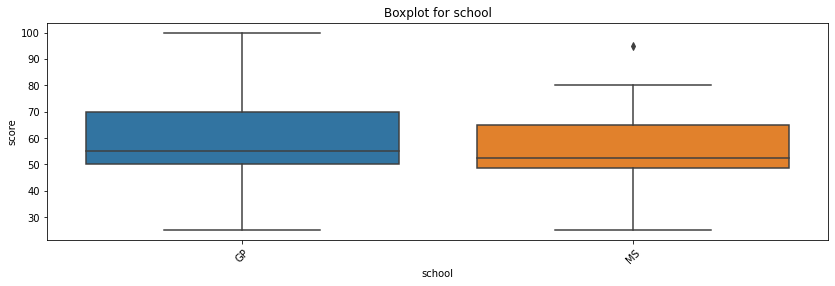

sex


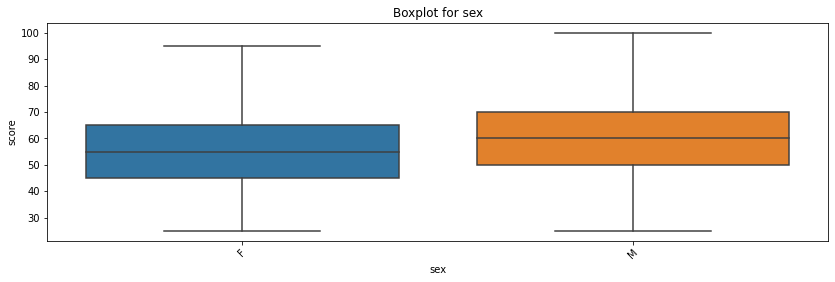

age


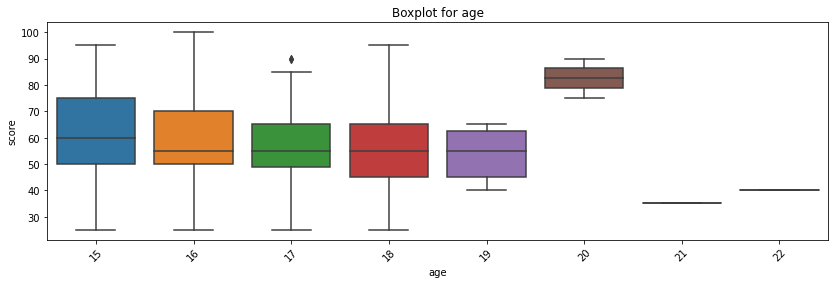

address


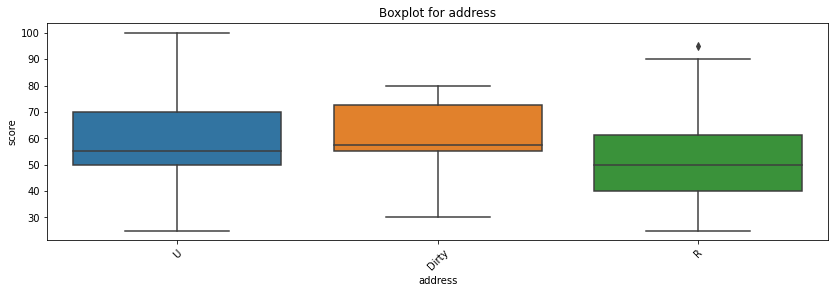

famsize


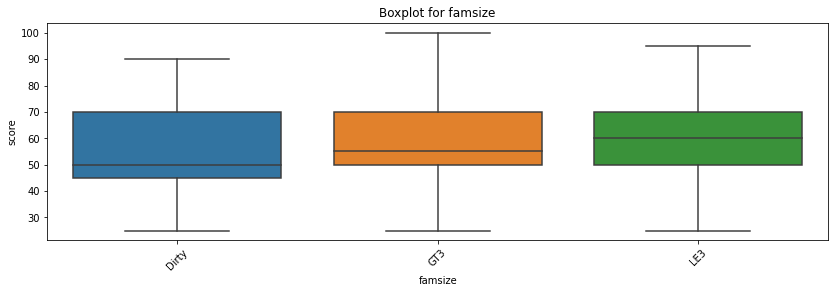

Pstatus


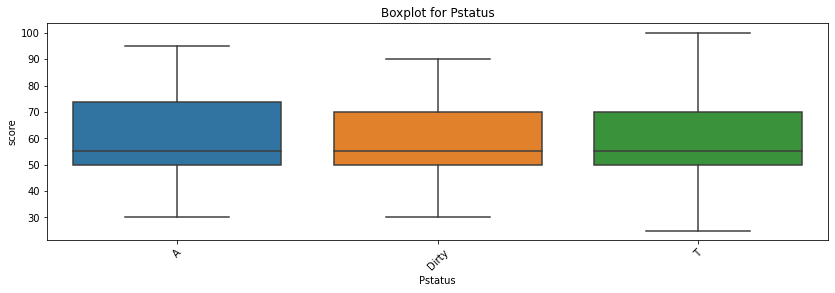

Medu


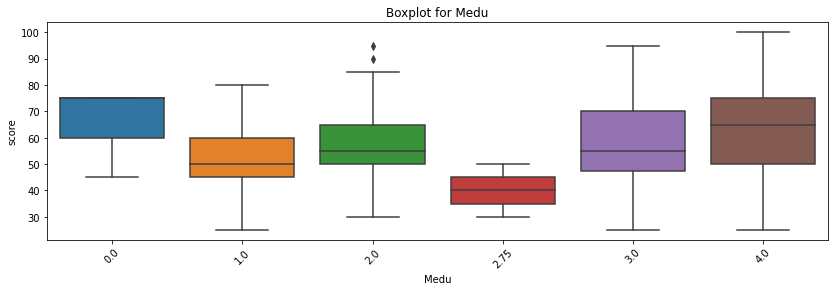

Fedu


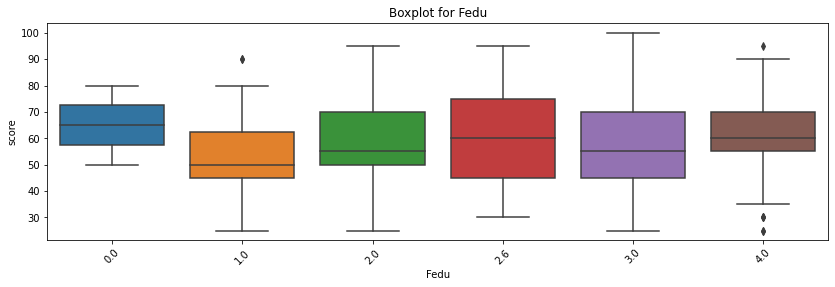

Mjob


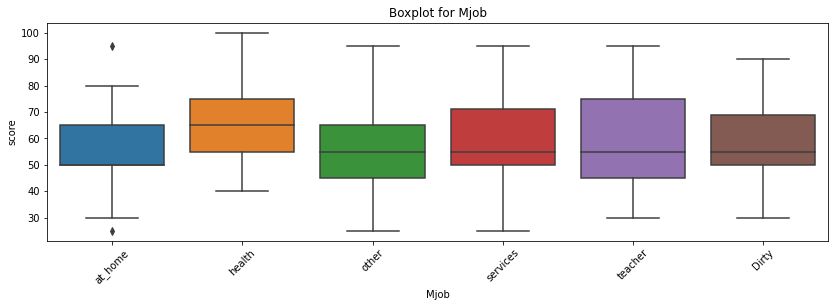

Fjob


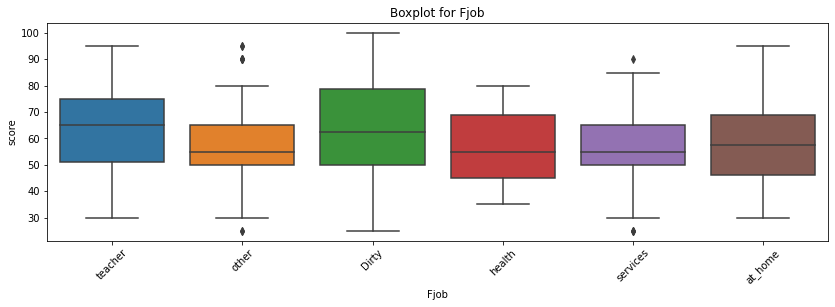

reason


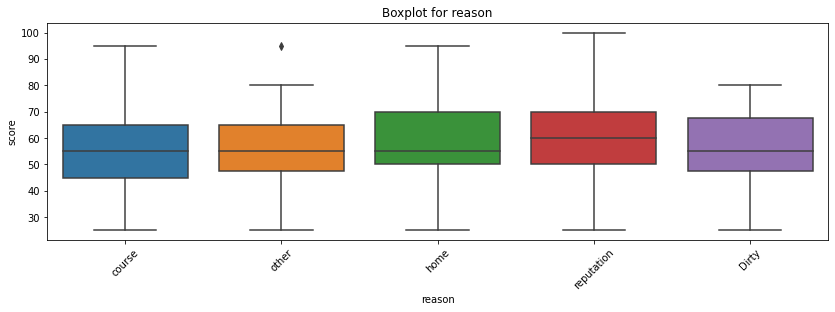

guardian


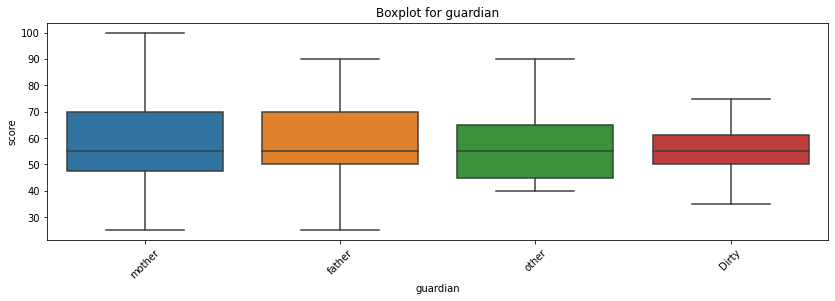

traveltime


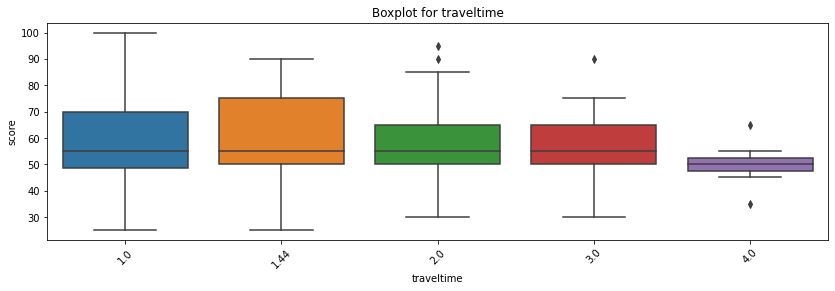

studytime


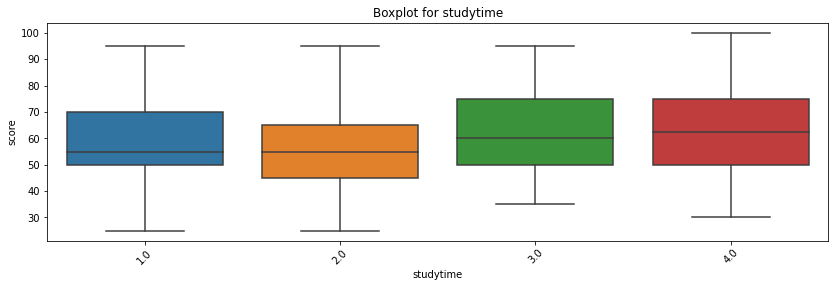

failures


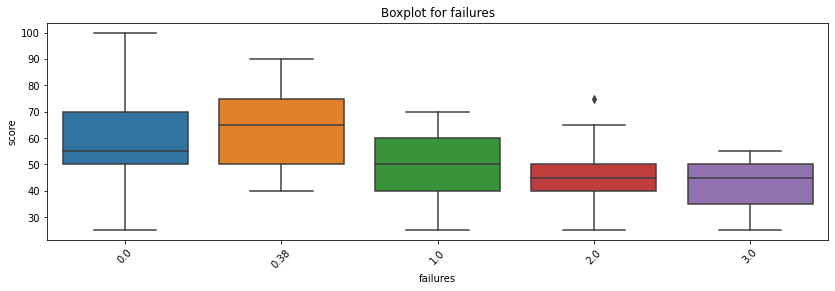

schoolsup


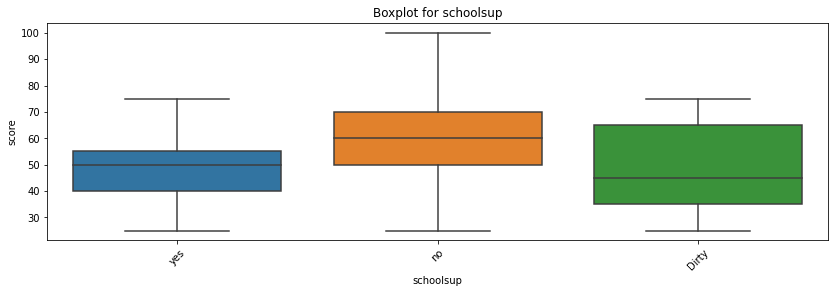

famsup


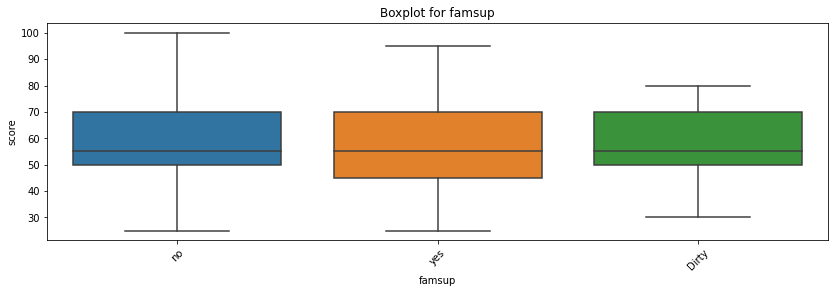

paid


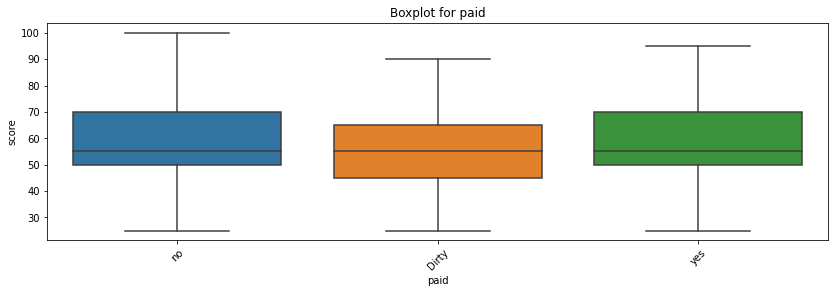

activities


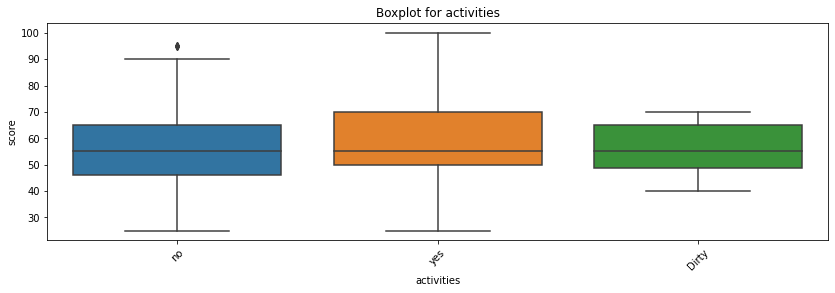

nursery


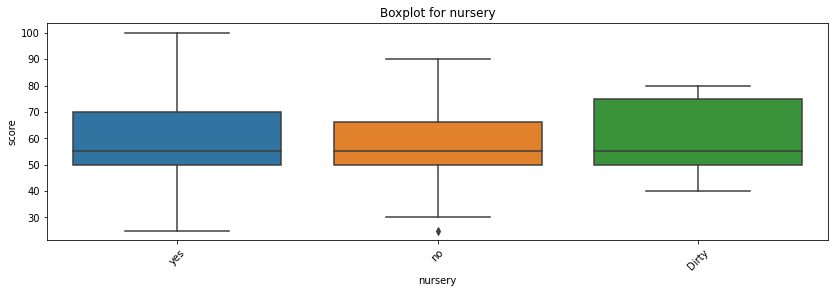

higher


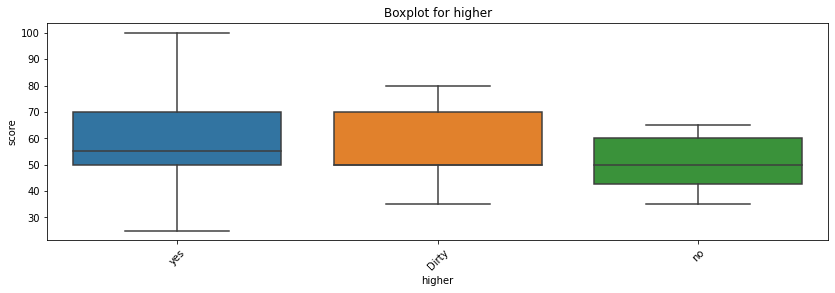

internet


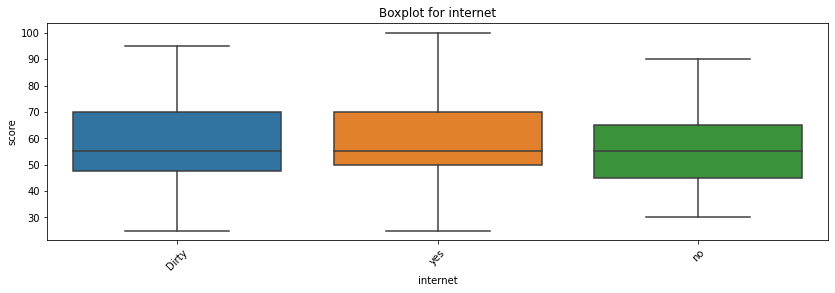

romantic


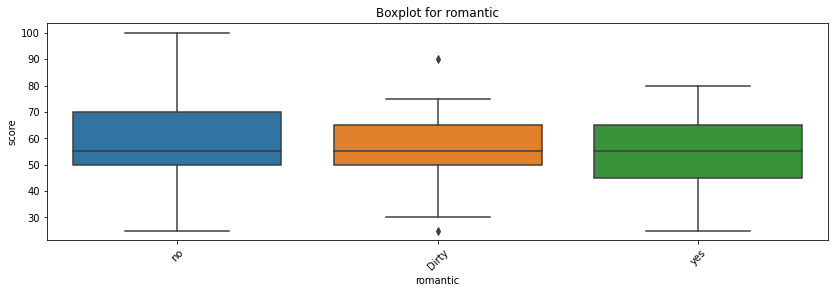

famrel


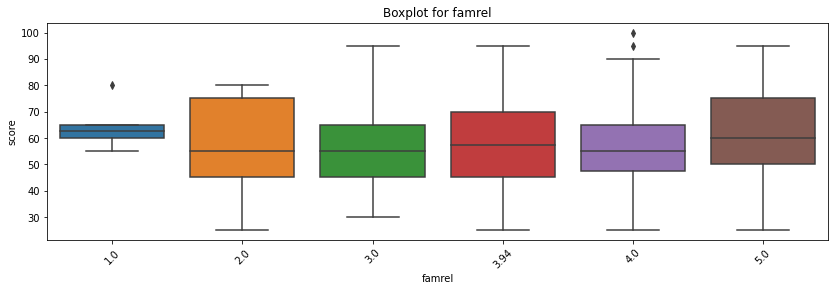

freetime


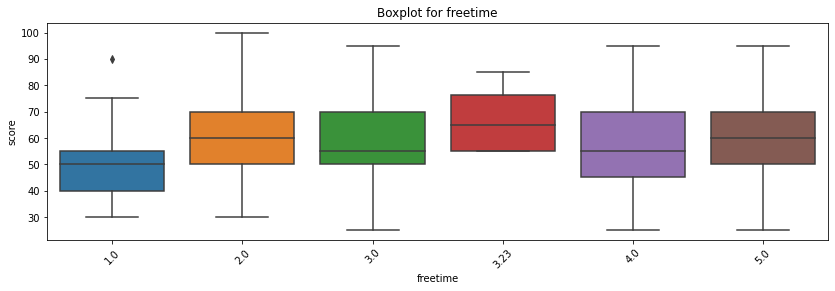

goout


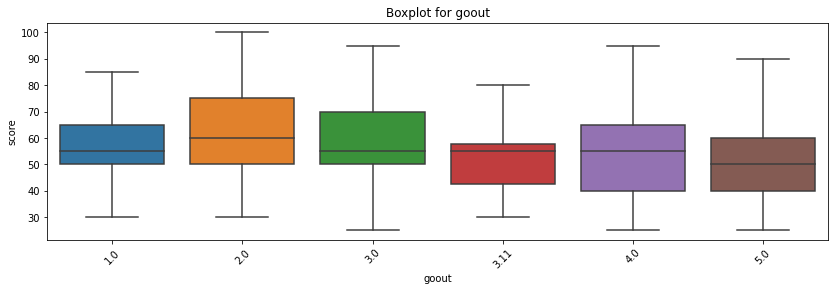

health


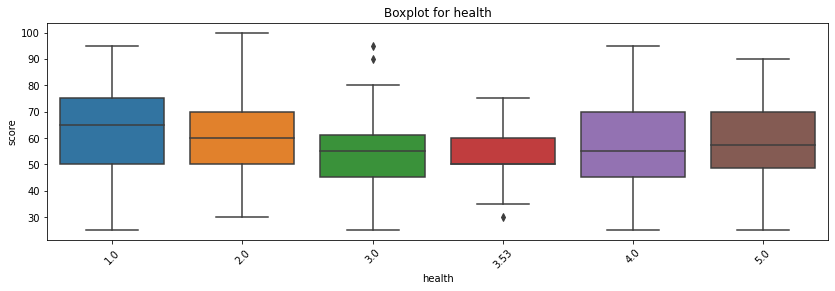

absences


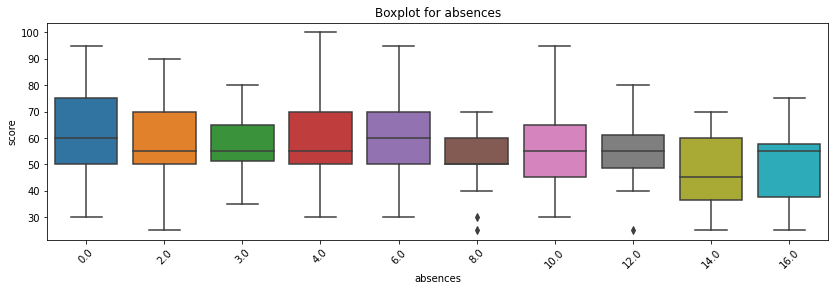

score


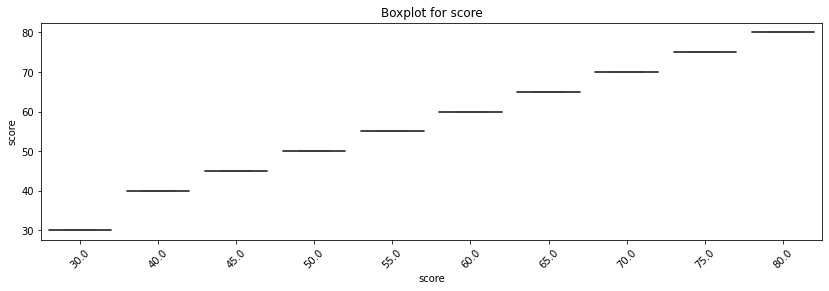

In [1199]:
for col in students.columns.tolist(): get_boxplot(col)

In [1200]:
for column in students.select_dtypes(include='object').columns.tolist():
  get_stat_dif(column)
students.info()

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      330 non-null    object 
 1   sex         330 non-null    object 
 2   age         330 non-null    int64  
 3   address     330 non-null    object 
 4   famsize     330 non-null    object 
 5   Pstatus     330 non-null    object 
 6   Medu        330 non-null    float64
 7   Fedu        330 non-null    float64
 8   Mjob        330 non-null    object 
 9   Fjob        330 non-null    object 
 10  reason      330 non-null    object 
 11  guardian    330 non-null    object 
 12  traveltime  330 non-null    float64
 13  studytime   330 non-null    float64
 14 

Предлагаю следующие преобразования:
- age отбросить 20,21,22
- Medu отбросить 0, 2.75
- Fedu отбросить 0
- traveltime отбросить 4
- failures заменить 0.38 на 0, 2 и 3 на 1
- famrel отбросить 2 и 1
- freetime отбросить 1
-
- address отбросить Dirty, U:1, R:0
- famsize заменить Dirty на LE3, LE3:0, GT3:1
- Pstatus заменить Dirty на T, T:0, A:1
- Mjob Dirty:other
- Fjob Dirty:other
- reason Dirty:other
- guardian Dirty:other
- schoolsup Dirty:0.5, no:0, yes:1
- famsup Dirty:0.5, no:0, yes:1
- paid Dirty:0.5, no:0, yes:1
- activities Dirty:0.5, no:0, yes:1
- nursery Dirty:0.5, no:0, yes:1
- higher Dirty:0.5, no:0, yes:1
- internet Dirty:0.5, no:0, yes:1
- romantic Dirty:0.5, no:0, yes:1
-
- absences отбросить более 20
- score отбросить 0

In [1201]:
for column in ['schoolsup','famsup','paid','activities', \
               'nursery','higher','internet','romantic']:
  students[column].replace(inplace=True, to_replace='Dirty', value=0.5)
  students[column].replace(inplace=True, to_replace='no', value=0)
  students[column].replace(inplace=True, to_replace='yes', value=1)

for column in ['Mjob','Fjob','reason','guardian']:
  students[column].replace(inplace=True, to_replace='Dirty', value='other')

students['Pstatus'].replace(inplace=True, to_replace='Dirty', value=0.5)
students['Pstatus'].replace(inplace=True, to_replace='T', value=0)
students['Pstatus'].replace(inplace=True, to_replace='A', value=1)

students['famsize'].replace(inplace=True, to_replace='Dirty', value=0.5)
students['famsize'].replace(inplace=True, to_replace='LE3', value=0)
students['famsize'].replace(inplace=True, to_replace='GT3', value=1)

students['address'].replace(inplace=True, to_replace='Dirty', value=0.5)
students['address'].replace(inplace=True, to_replace='R', value=0)
students['address'].replace(inplace=True, to_replace='U', value=1)

students = students.loc[students['age'] < 20]
students = students.loc[students['Medu'] != 0]
students = students.loc[students['Medu'] != 2.75]
students = students.loc[students['Fedu'] != 0]

#students['Pedu'] = students['Medu']+ students['Fedu']
#students.drop(inplace=True, columns=['Medu','Fedu'])

students = students.loc[students['traveltime'] != 4]
students = students.loc[students['famrel'] != 2]
students = students.loc[students['famrel'] != 1]
students = students.loc[students['freetime'] != 1]

students['failures'] = students['failures'].apply(lambda x: 0 if x==0.38 else x)
students['failures'] = students['failures'].apply(lambda x: 1 if x>1 else x)

students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      282 non-null    object 
 1   sex         282 non-null    object 
 2   age         282 non-null    int64  
 3   address     282 non-null    float64
 4   famsize     282 non-null    float64
 5   Pstatus     282 non-null    float64
 6   Medu        282 non-null    float64
 7   Fedu        282 non-null    float64
 8   Mjob        282 non-null    object 
 9   Fjob        282 non-null    object 
 10  reason      282 non-null    object 
 11  guardian    282 non-null    object 
 12  traveltime  282 non-null    float64
 13  studytime   282 non-null    float64
 14  failures    282 non-null    float64
 15  schoolsup   282 non-null    float64
 16  famsup      282 non-null    float64
 17  paid        282 non-null    float64
 18  activities  282 non-null    float64
 19  nursery     282 non-null    f

Анализируем снова

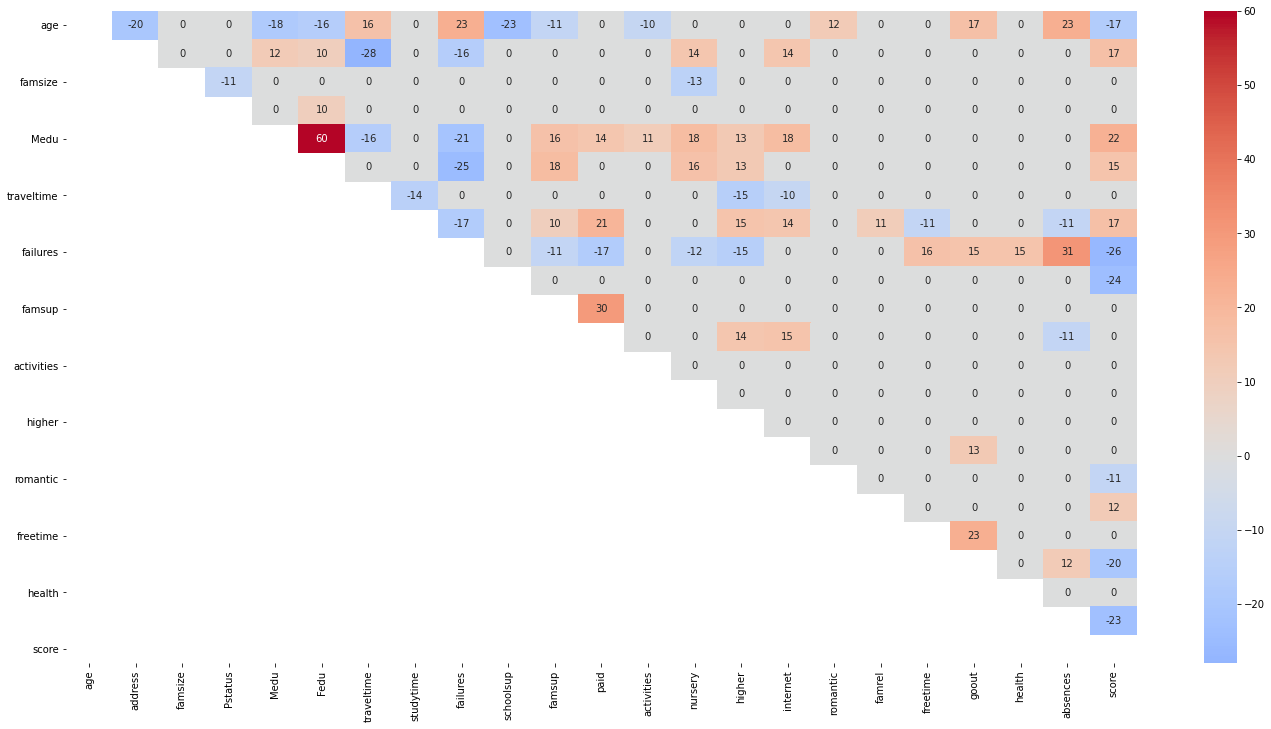

In [1202]:
matrix = np.tril(students.corr())
corr = students.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
plt.gcf().set_size_inches(24, 12)

In [1157]:
students.drop(inplace=True, columns=[ \
  'absences','health','goout','freetime', \
  'famrel','romantic','schoolsup', 'traveltime', \
  'famsize','Pstatus','studytime' 
])

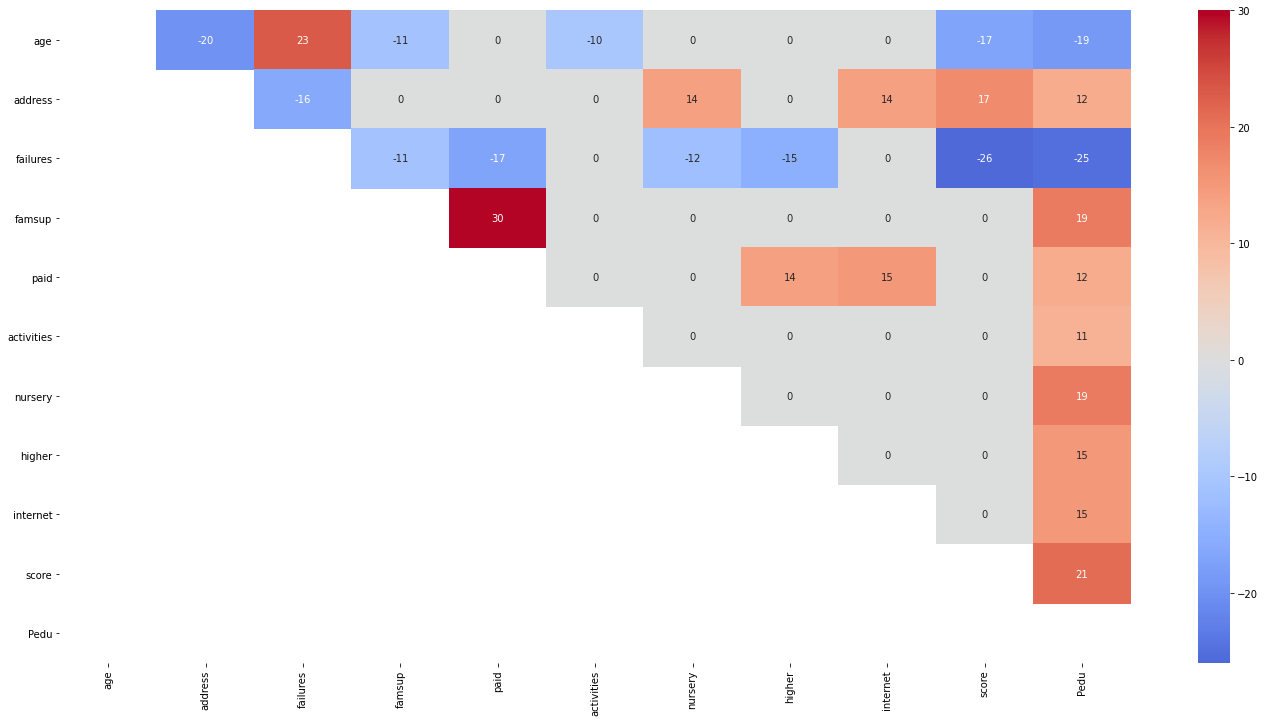

In [1158]:
matrix = np.tril(students.corr())
corr = students.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
plt.gcf().set_size_inches(24, 12)

school


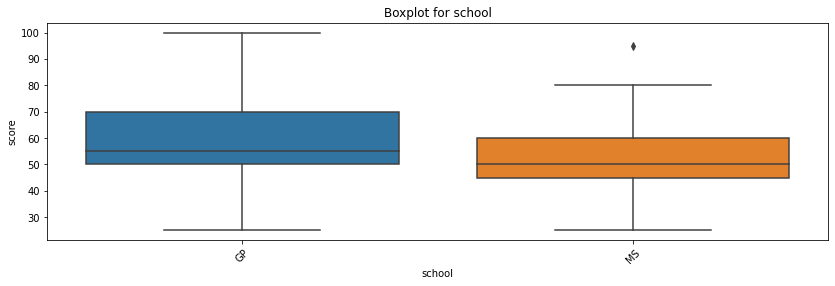

sex


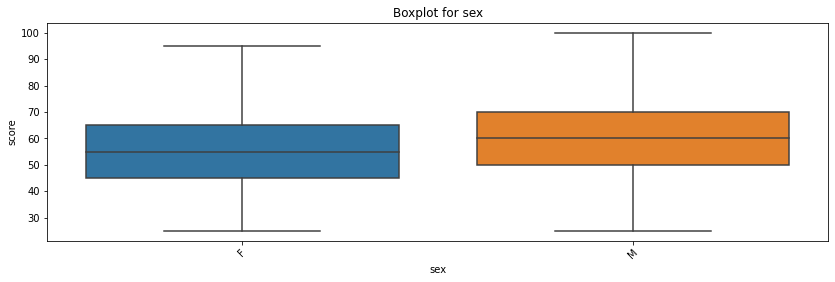

Mjob


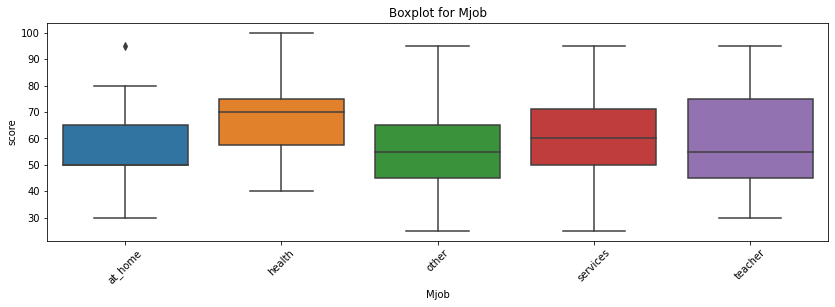

Fjob


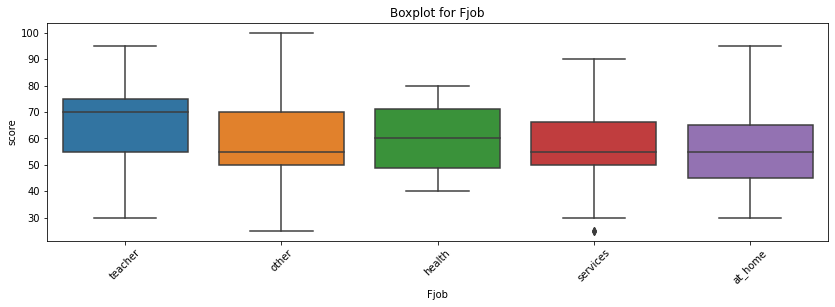

reason


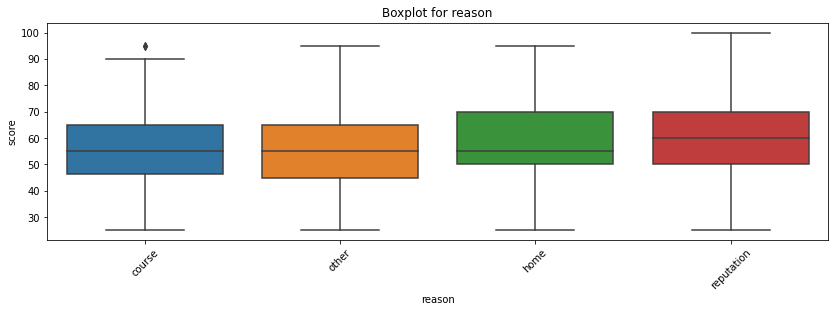

guardian


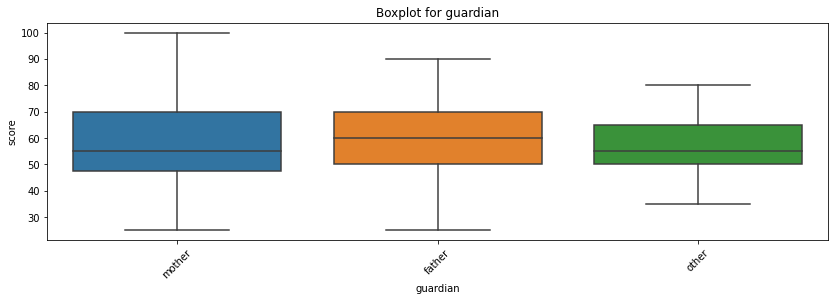

In [1110]:
for column in students.select_dtypes(include='object').columns.tolist():
  get_boxplot(column)

In [1111]:
for column in students.select_dtypes(include='object').columns.tolist():
  get_stat_dif(column)

Найдены статистически значимые различия для колонки Mjob


6) Отбор не коррелирующих
===

7) Устранение не влияющих
===

8) Выводы
===

С очисткой данных можно перестарасться и потерять в них смысл.


- Найдены статистически значимые различия для колонки sex
- Найдены статистически значимые различия для колонки address
- Найдены статистически значимые различия для колонки Mjob
- Найдены статистически значимые различия для колонки schoolsup

Для построение модели выберу следующие поля:
- sex
- address
- Mjob
- schoolsup
-
- absences
- goout
- famrel
- romantic
- schoolsup
- failures
- studytime
- Fedu
- Medu
- age


!!! Запускать только до сюда.
===
Далее архив бреда

In [ ]:
np.nan = 1/0

5) Корреляционный анализ Старый вариант
===

In [ ]:
 #sns.pairplot(students, kind = 'reg')

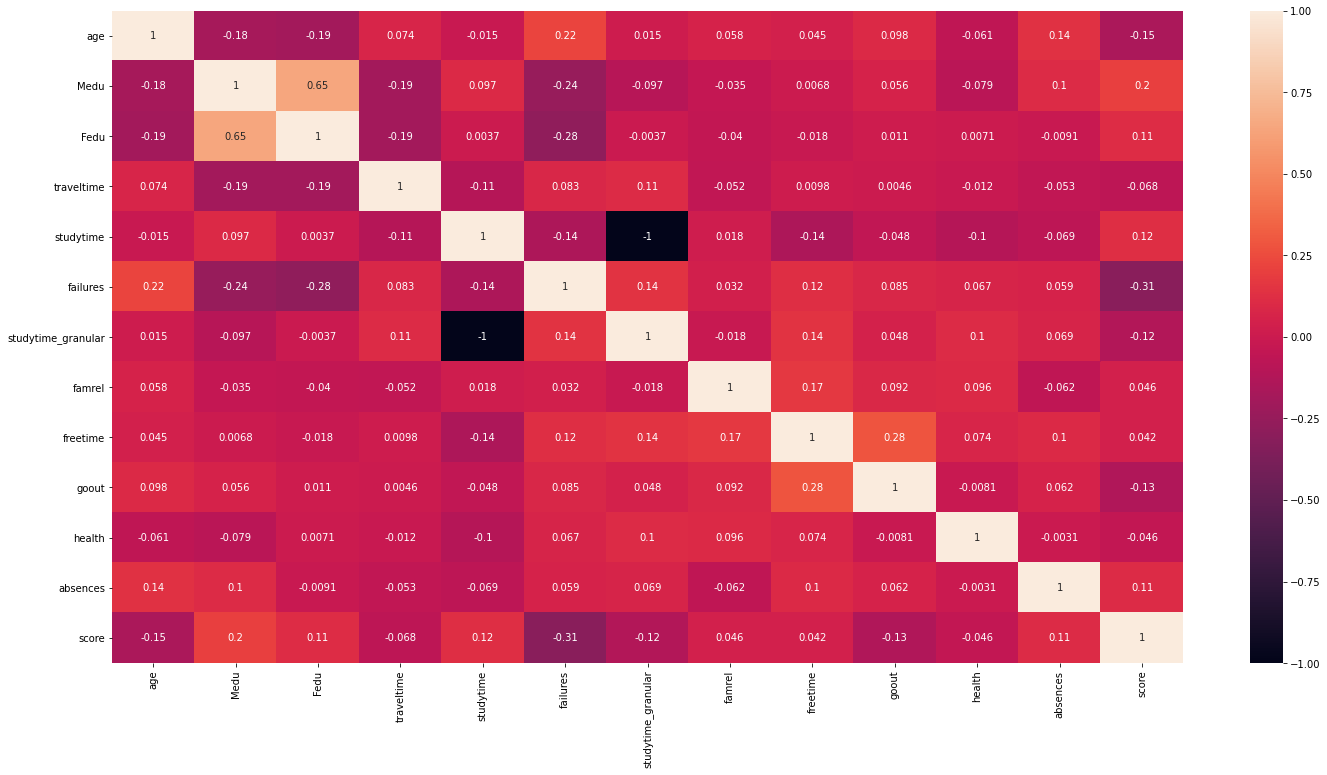

In [ ]:
sns.heatmap(students.corr(), annot=True)
plt.gcf().set_size_inches(24, 12)

In [ ]:
#Отбросим лишнее сразу
students.drop(inplace=True, columns=('studytime_granular'))

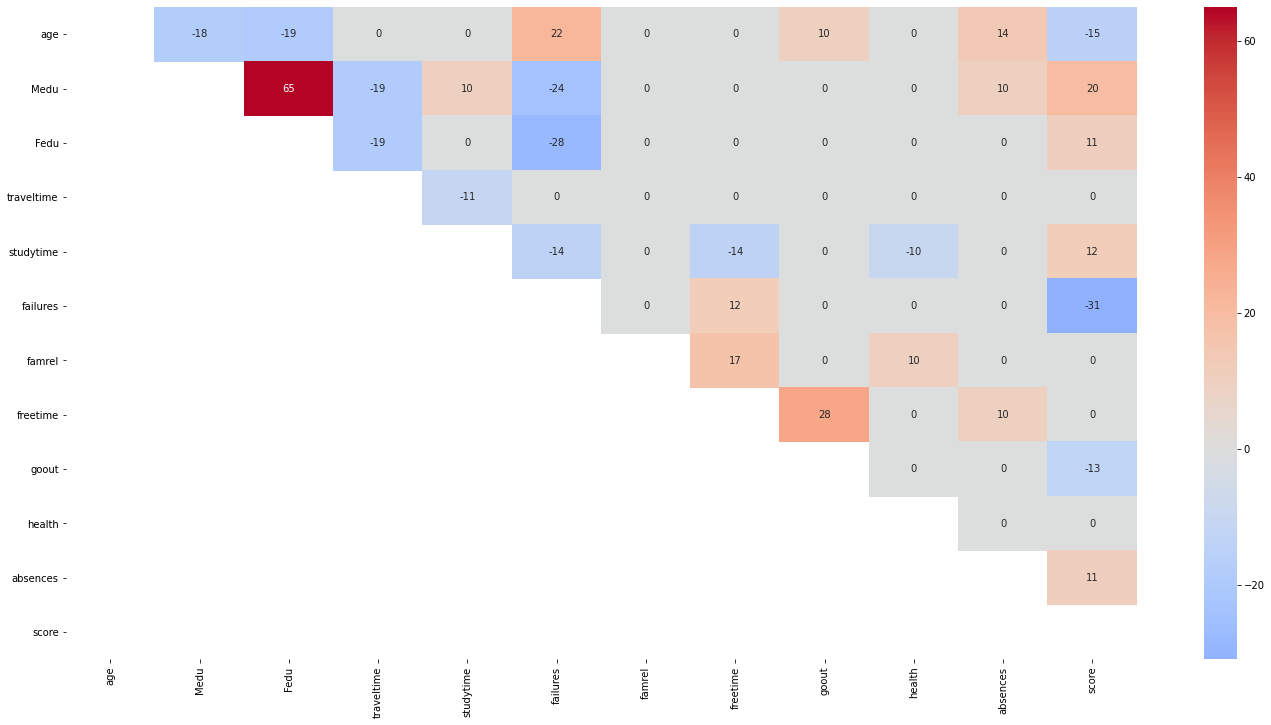

In [ ]:
matrix = np.tril(students.corr())
corr = students.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
plt.gcf().set_size_inches(24, 12)

Пойманные за хвост мысли
- **studytime_granular** первый к выбросу как завуалированная копия **studytime**
- 
- У менее **age** учеников более **Medu** и **Fedu**, значит общий уровень образования повышается со временем или образованные родители заводят детей позднее.
- С возрастом приходит склонность к **absences**, больше возможносей заполучить **failures** и требуется больше времени на **goout** всё это негативно сказывается на **score**.
- 
- Сильная корреляция **Medu** и **Fedu** говорит, что родители чаще образуют пары из равных по уровню познания мира. Возможно стоит заменить этот параметр на общий уровень образования родителей.
- Отрицательная корреляция **Medu** и **Fedu** с количесвом **failures** и **traveltime** может указывать на лучшее планировании безопасности и свободного времени среди образованных пар.
- Кореляция **score** с **Medu** больше чем с **Fedu**, значит, что более образованные матери более требовательны к **studytime**, хоть это и приводит в результате к большим **absences**.
- 
- Отрицательная корреляция **traveltime** и **studytime** выглядит логично. И только.
-
- Отрицательная корреляция **studytime** с **freetime**, **failures**, **health**, выглядит логично - занят сидением за учебниками, а не приключениями и зарабатываением опыта. Зато это положительно влияет на **score**.
- 
- Корелляция **failures** и **freetime** логична. За учебником сильно не порискуешь. А результат рисков очень негативен для **score**.
-
- Корреляция **famrel** с **freetime** и **health** свидетульствует о взаимопомощи и отсутствии стресса. Жаль, что этого не достаточно для влияния на оценки.
- 
- Корреляция **freetime** и **goout** указывают источник интереснее учёбы, но привыкаешь, что даже **absences** растут. Благо оценки от этого не страдают.
-
- А вот тупо **goout** отупляет обоих и плохо сказывается на **score**.
-
- **health** не влияет на **score** никак. Тело и мозг независимы :-)
-
- А вот за **absences** неожиданно положительно влияет на **score**. Возможно из-за совести учащегося или родителей. Иначе бы свободное время так же положительно влияло, как и внеплановый отдых.



К сожалению я не упею перевести все пораметры в числовые для подобного анализа, да и навык другого подхода к анализу номинативных признаков должен быть.

Не мудрствуя лукаво применим подход из примера.

In [ ]:
def get_boxplot(column):
    global students
    print(column)
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

school


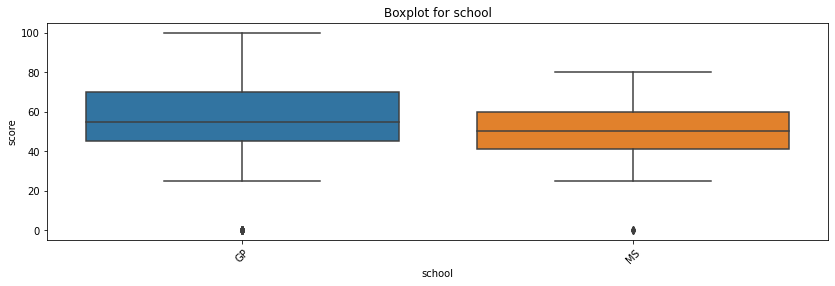

sex


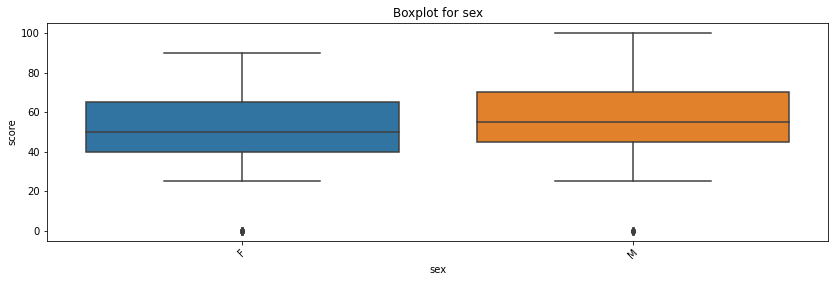

age


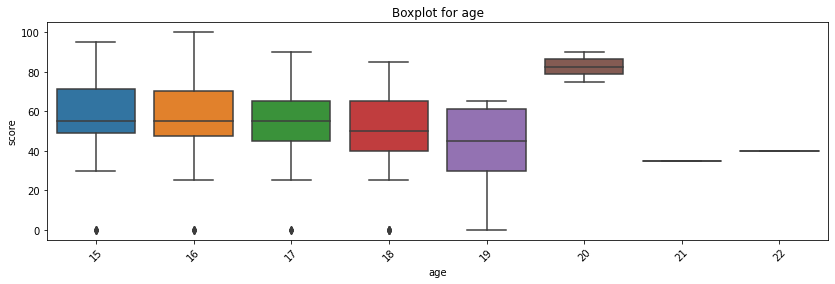

address


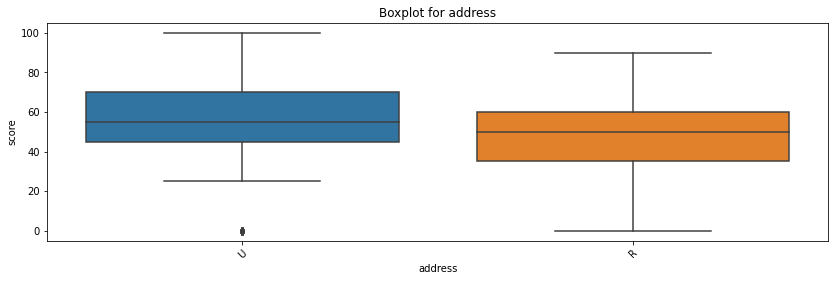

famsize


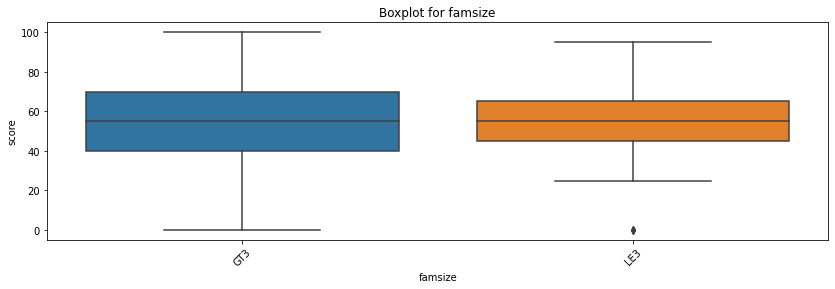

Pstatus


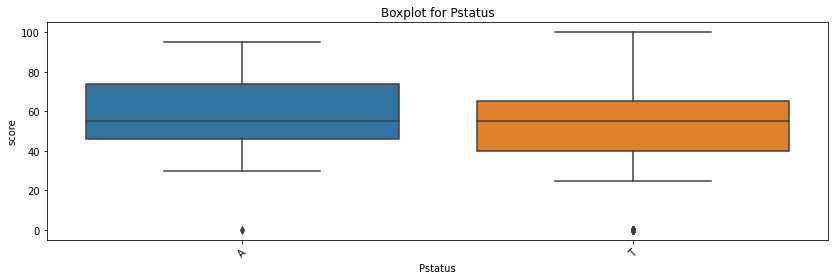

Medu


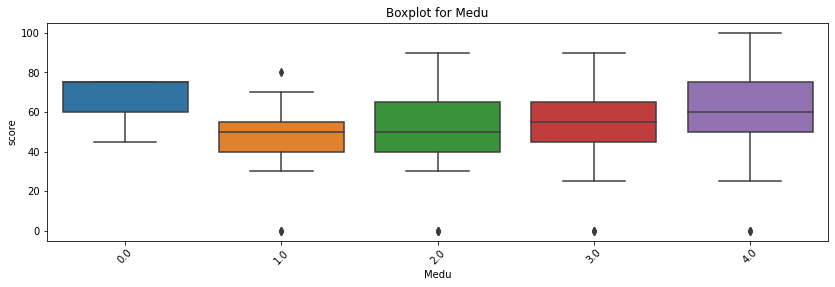

Fedu


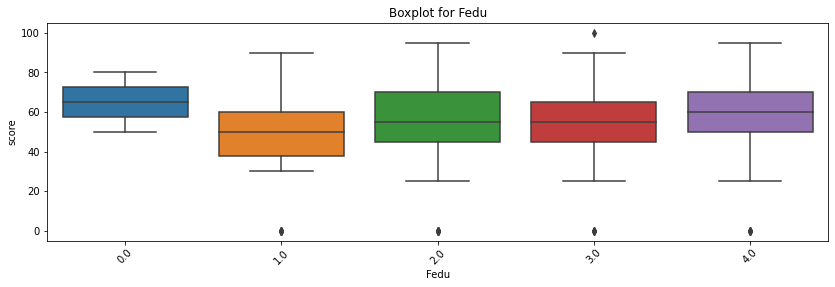

Mjob


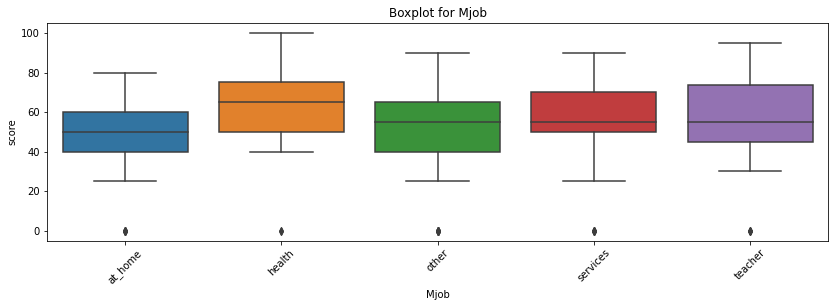

Fjob


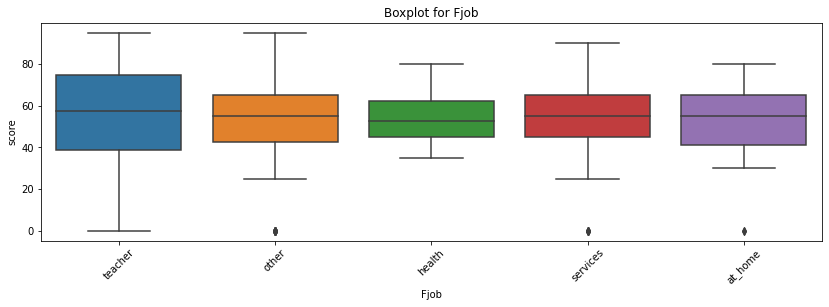

reason


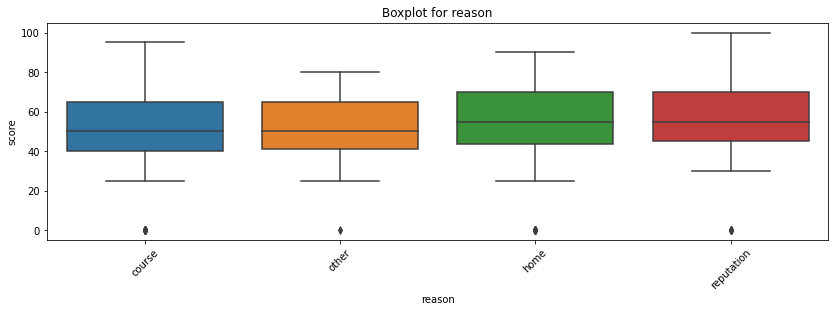

guardian


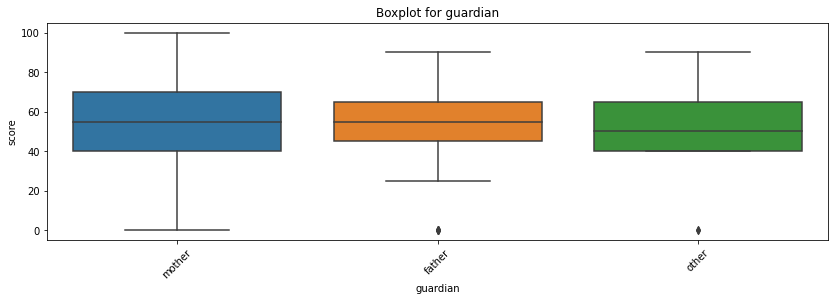

traveltime


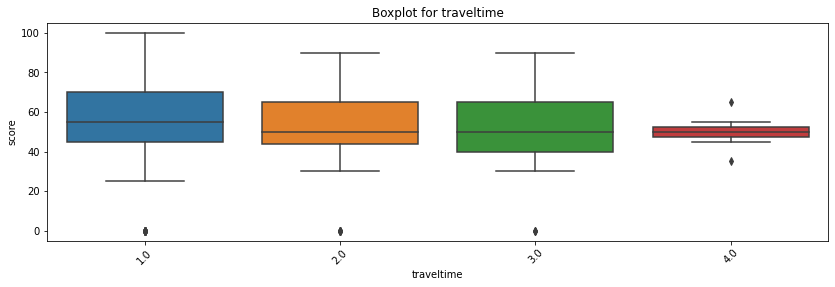

studytime


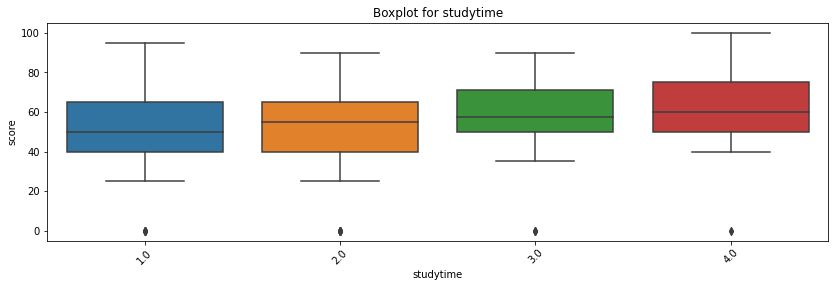

failures


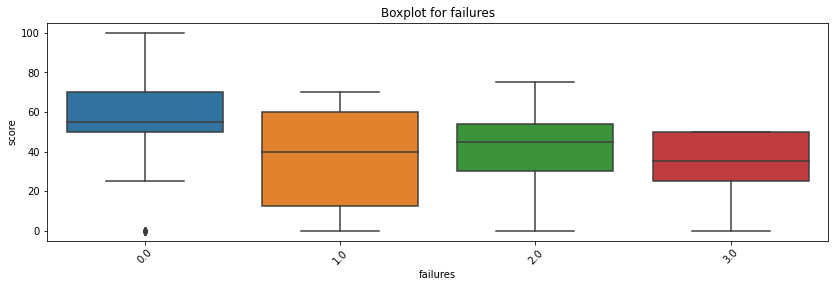

schoolsup


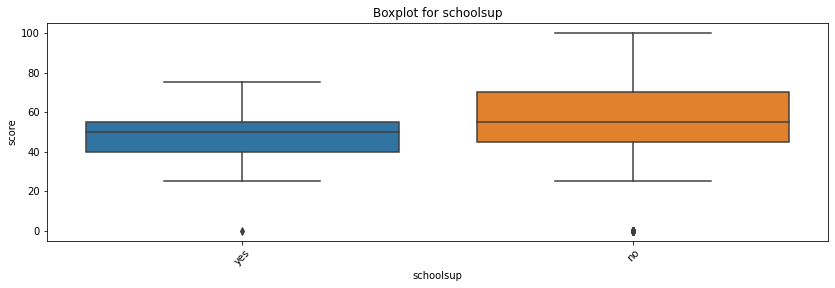

famsup


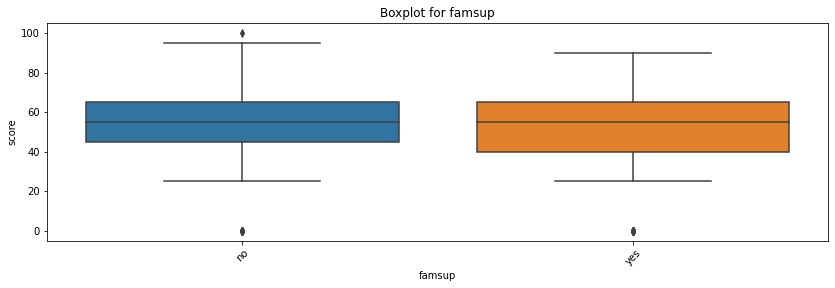

paid


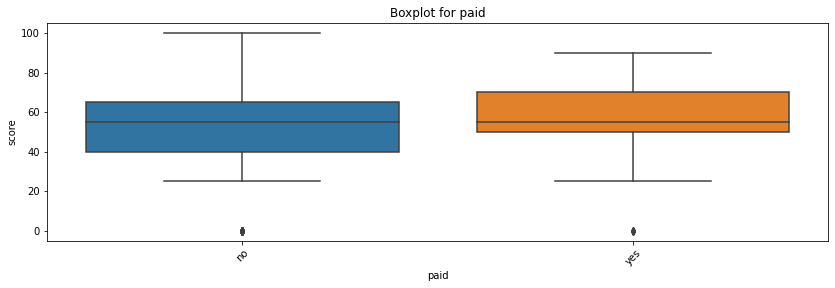

activities


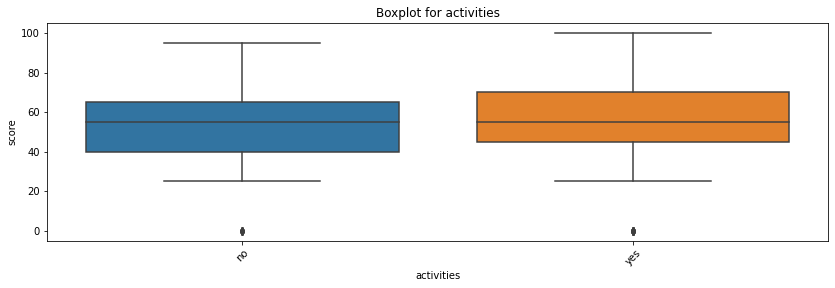

nursery


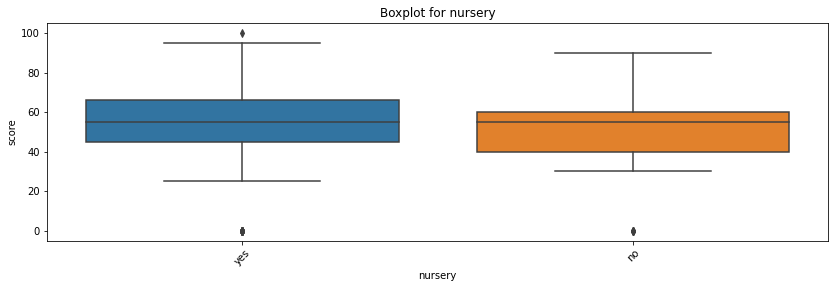

higher


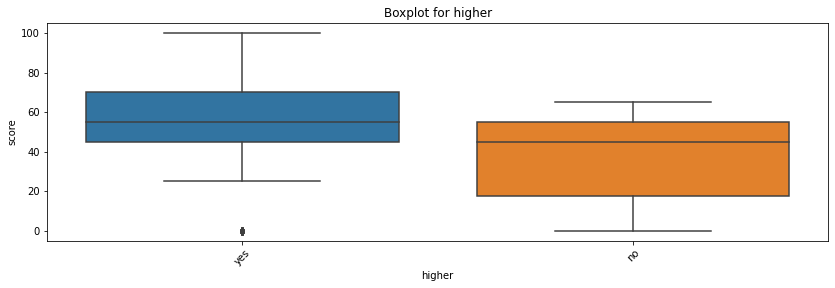

internet


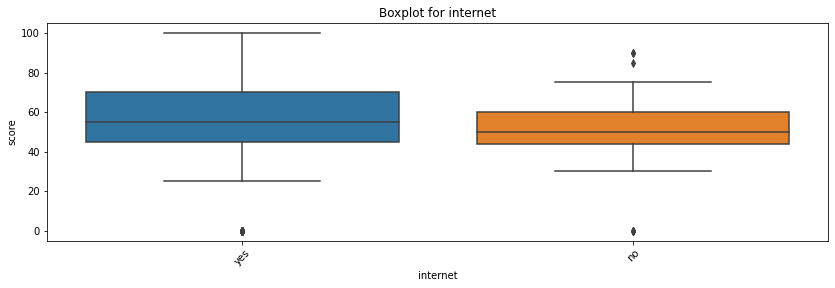

romantic


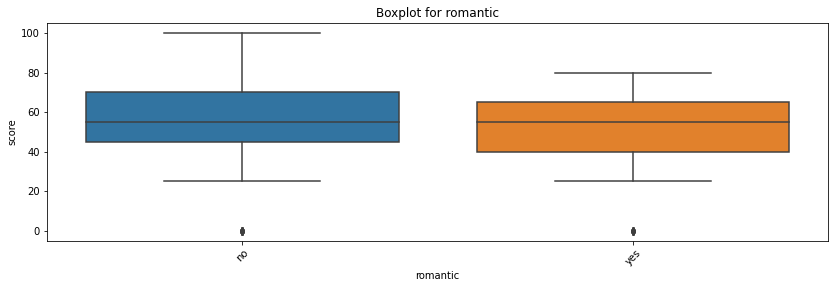

famrel


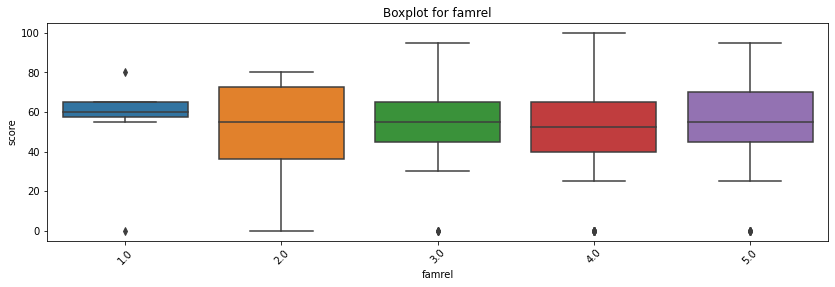

freetime


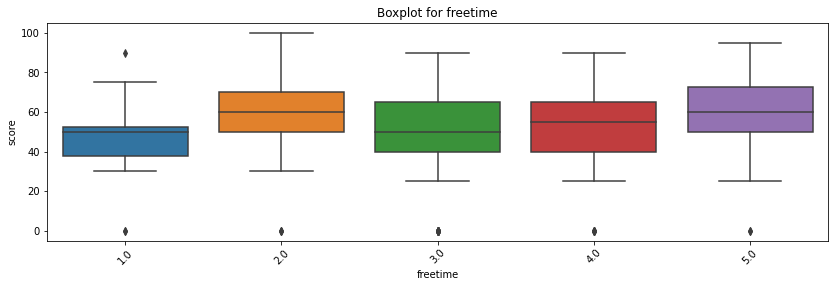

goout


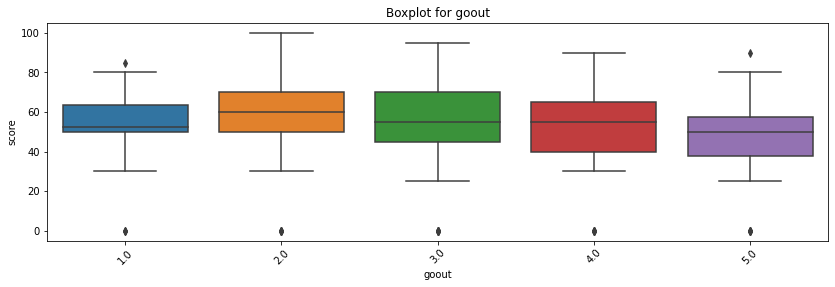

health


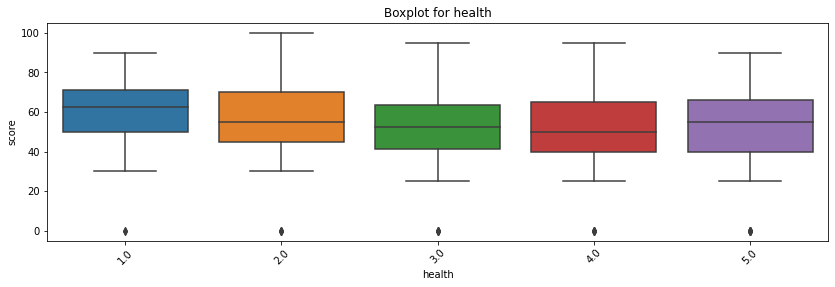

absences


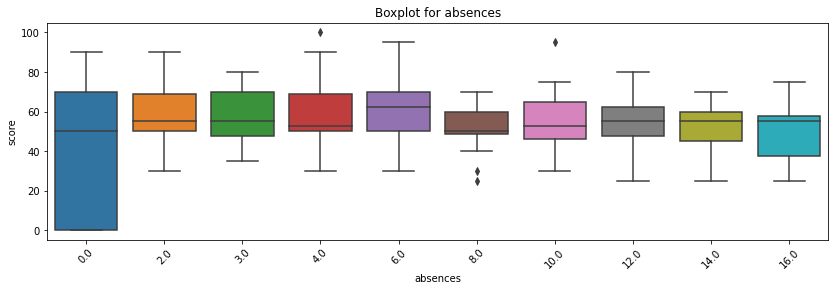

In [ ]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_boxplot(col)



На вскидку со **score** слабо коррелируют признаки:
- **school** В школе GP более сильная подготовка, но и там есть троешники
- **sex** Мальчики в целом добиваются лучших результатов
- **famsize** 50% очень близок, хоть и для многодетных распределение более гладкое
- **Pstatus** 50% очень близок для обоих групп
- **Fjob** 50% очень близок у всех, хоть и отцы-врачи совсем раздолбаев не воспитывают, а отцы-учителя могут в лучше подготовить если вообще занимаются
- **reason** Не зависимо от причины выбора школы результат образования без перекосов
- **guardian** Если опекун не родитель, то результат ниже среднего падать может только вдребезги
- **traveltime** выделяется лишь длительные поездки своей малочисленностью и дискретностью
- **famsup** Упорство семьи не способно победить ученика-барана. Личная мотивация важнее.
- **paid** Репититоры также слабее личной мотивации. Стоит ли тратить деньги?
- **activities** Доп занятия положительно сказываются на резьтатататах учёбы, но очень незначительно
- **nursery** Посещение детского сада также слабо связано с итоговым уровнем знаний
- **internet** бибилиотеки никто не отменял, и скоро интернет будет просто у всех
- **romantic** любовь дурманит голову, но статистически незначительно
- **health** влияет безхарактерно, но просто будьте все здоровы

Есть заметное влияние следующих признаков:
- **age** Ввиду малочисленности группы великовозрастных их стоит анализировать отдельно. Я бы даже 19 лет отдельно посмотрел, а то они както штрейхбрехерски пошли по наклонной.
- **address** городским видимо до бибилиотеки ближе или просто времени меньше зря тратят в поездках
- **Medu** и **Fedu** здесь ведут седя также кучно и уровень матери более гладко влияет начиная с "младшей школы" Особняком стоит случай совсем необразованных родителей
- **Mjob** для домохозяек вниз, для врачей вверх, что в свою очередь коррелирует с отцами медиками... чтото в этом есть
- **studytime** тут без положительной корреляции никуда.
- **failures** похоже личный стресс учит: в жизни есть вещи важнее образования
- **schoolsup** доп занятия в школе положительно влияют - продлёнке быть!
- **higher** личная мотивация на лицо
- **famrel** особняком стоят категории ниже среднего. Очень хочеться изучить корреляцию с возрастом
- **freetime** две волны, от нет до чуток и от средне до много но вторая более пологая
- **goout** чуток потусить с друзьями - норм, а вот постоянные вечеринки тянут вниз
- **absences** крепкий орешек, который легче выбросить, чем понять

Но и это ещё не всё. Натравим на данные натренированный тест Стьюдента

In [ ]:
def get_stat_dif(column):
    global students
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_stat_dif(col)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 